# Analysis Of MI VS RR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [4]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [5]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
Matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [11]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [12]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

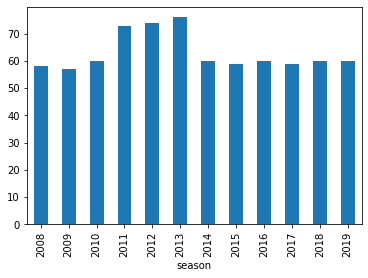

In [13]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [14]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [15]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

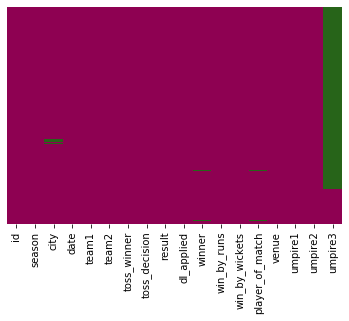

In [16]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [17]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [18]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

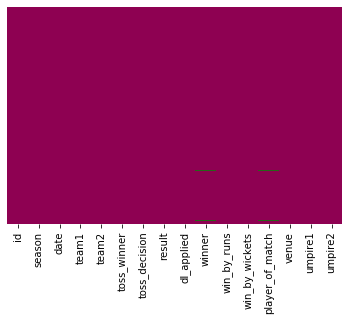

In [19]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Mumbai Indians (MI) and Rajastan Royals(RR).so we only want information between the matches that had take place between them.

In [32]:
MI_RR1=Matches.loc[(Matches['team1']=='Mumbai Indians')&(Matches['team2'] =='Rajasthan Royals')]
MI_RR1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
112,113,2008,Jaipur,2008-05-26,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,Sohail Tanvir,Sawai Mansingh Stadium,BF Bowden,K Hariharan,NaN
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN
218,219,2010,Jaipur,2010-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium,BR Doctrove,SK Tarapore,NaN
266,267,2011,Jaipur,2011-04-29,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,J Botha,Sawai Mansingh Stadium,Asad Rauf,SK Tarapore,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
318,319,2012,Mumbai,2012-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,27,0,KA Pollard,Wankhede Stadium,Aleem Dar,BNJ Oxenford,NaN
446,447,2013,Mumbai,2013-05-15,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,14,0,AP Tare,Wankhede Stadium,Asad Rauf,S Asnani,NaN
500,501,2014,Ahmedabad,2014-05-19,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,25,0,MEK Hussey,"Sardar Patel Stadium, Motera",S Ravi,RJ Tucker,NaN
525,526,2015,Ahmedabad,2015-04-14,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,7,SPD Smith,"Sardar Patel Stadium, Motera",AK Chaudhary,SD Fry,NaN
548,549,2015,Mumbai,2015-05-01,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,8,0,AT Rayudu,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN


In [33]:
MI_RR2=Matches.loc[(Matches['team2']=='Mumbai Indians')&(Matches['team1'] =='Rajasthan Royals')]

In [34]:
MI_RR2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN
159,160,2009,Durban,2009-05-14,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,Kingsmead,BR Doctrove,DJ Harper,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
402,403,2013,Jaipur,2013-04-17,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,87,0,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,C Shamshuddin,NaN
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel,NaN
512,513,2014,Mumbai,2014-05-25,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,K Srinath,RJ Tucker,NaN


In [35]:
MI_RR=MI_RR1.append(MI_RR2)

In [36]:
MI_RR

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
112,113,2008,Jaipur,2008-05-26,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,Sohail Tanvir,Sawai Mansingh Stadium,BF Bowden,K Hariharan,NaN
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN
218,219,2010,Jaipur,2010-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium,BR Doctrove,SK Tarapore,NaN
266,267,2011,Jaipur,2011-04-29,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,J Botha,Sawai Mansingh Stadium,Asad Rauf,SK Tarapore,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
318,319,2012,Mumbai,2012-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,27,0,KA Pollard,Wankhede Stadium,Aleem Dar,BNJ Oxenford,NaN
446,447,2013,Mumbai,2013-05-15,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,14,0,AP Tare,Wankhede Stadium,Asad Rauf,S Asnani,NaN
500,501,2014,Ahmedabad,2014-05-19,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,25,0,MEK Hussey,"Sardar Patel Stadium, Motera",S Ravi,RJ Tucker,NaN
525,526,2015,Ahmedabad,2015-04-14,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,7,SPD Smith,"Sardar Patel Stadium, Motera",AK Chaudhary,SD Fry,NaN
548,549,2015,Mumbai,2015-05-01,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,8,0,AT Rayudu,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN


In [37]:
MI_RR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 112 to 512
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               20 non-null     int64 
 1   season           20 non-null     int64 
 2   city             20 non-null     object
 3   date             20 non-null     object
 4   team1            20 non-null     object
 5   team2            20 non-null     object
 6   toss_winner      20 non-null     object
 7   toss_decision    20 non-null     object
 8   result           20 non-null     object
 9   dl_applied       20 non-null     int64 
 10  winner           20 non-null     object
 11  win_by_runs      20 non-null     int64 
 12  win_by_wickets   20 non-null     int64 
 13  player_of_match  20 non-null     object
 14  venue            20 non-null     object
 15  umpire1          20 non-null     object
 16  umpire2          20 non-null     object
 17  umpire3          4 non-null      o

# # Complete details of matches that takes placed between RR and MI

In [38]:
MI_RR.describe

<bound method NDFrame.describe of         id  season       city        date             team1             team2  \
112    113    2008     Jaipur  2008-05-26    Mumbai Indians  Rajasthan Royals   
175    176    2010     Mumbai  2010-03-13    Mumbai Indians  Rajasthan Royals   
218    219    2010     Jaipur  2010-04-11    Mumbai Indians  Rajasthan Royals   
266    267    2011     Jaipur  2011-04-29    Mumbai Indians  Rajasthan Royals   
298    299    2011     Mumbai  2011-05-20    Mumbai Indians  Rajasthan Royals   
318    319    2012     Mumbai  2012-04-11    Mumbai Indians  Rajasthan Royals   
446    447    2013     Mumbai  2013-05-15    Mumbai Indians  Rajasthan Royals   
500    501    2014  Ahmedabad  2014-05-19    Mumbai Indians  Rajasthan Royals   
525    526    2015  Ahmedabad  2015-04-14    Mumbai Indians  Rajasthan Royals   
548    549    2015     Mumbai  2015-05-01    Mumbai Indians  Rajasthan Royals   
656   7914    2018     Jaipur    22/04/18    Mumbai Indians  Rajasthan Roya

In [39]:
print("No of matches that takes place between KXIP and DC:",len(MI_RR))

No of matches that takes place between KXIP and DC: 20


#  Below plot gives the details of the match that takes place between RR and MI

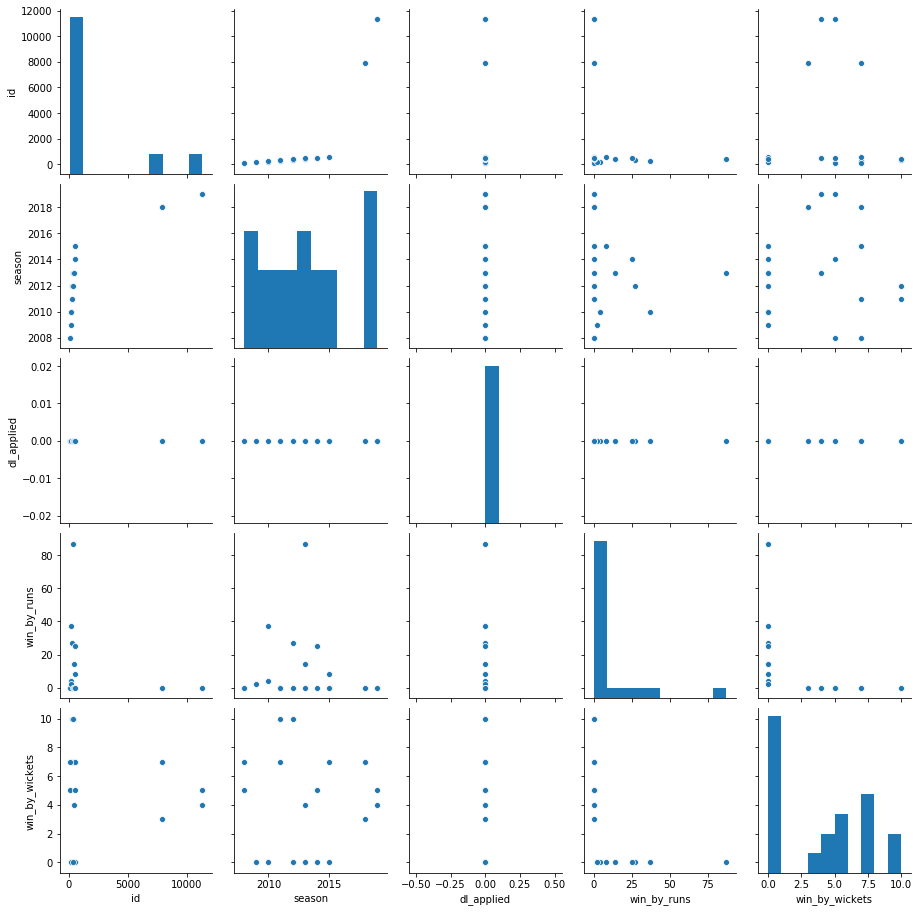

In [40]:
sns.pairplot(MI_RR)

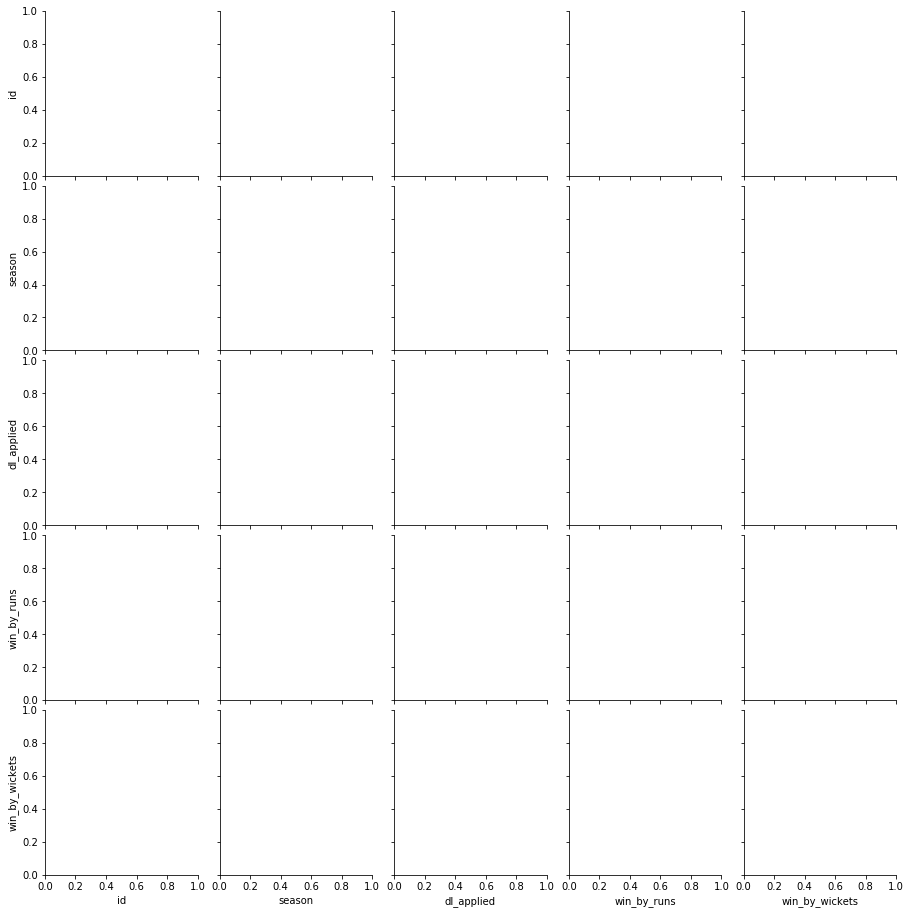

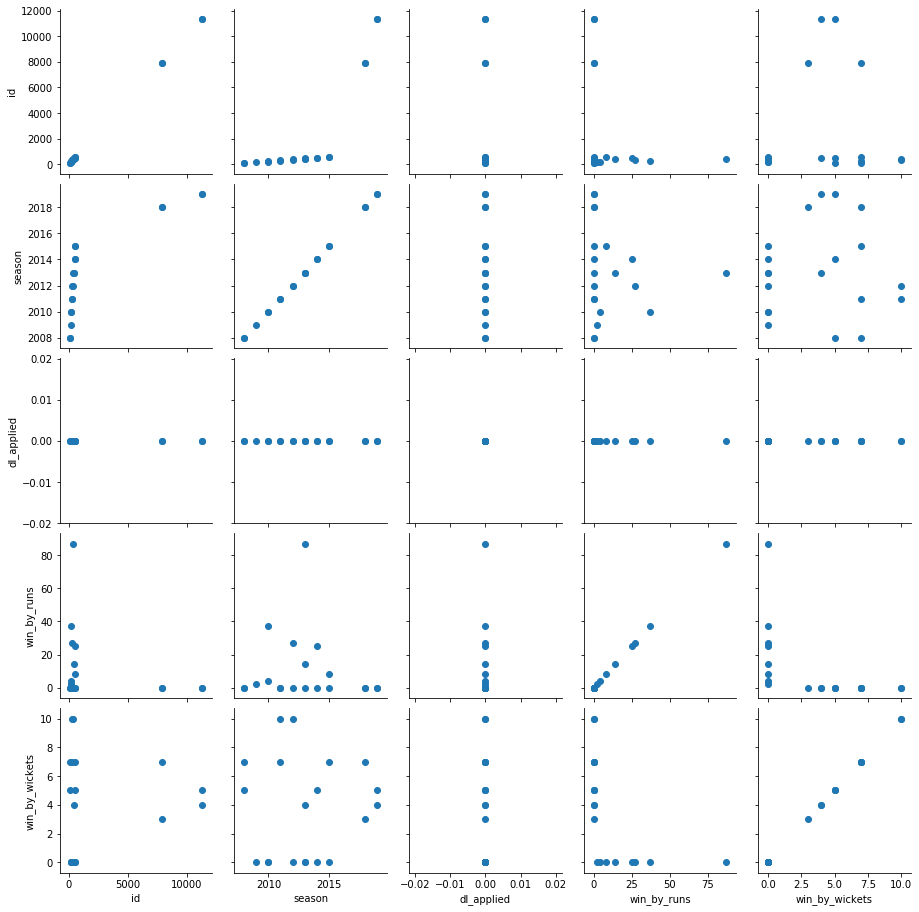

In [41]:
sns.PairGrid(MI_RR)
g=sns.PairGrid(MI_RR)
g.map(plt.scatter)

#  It looks like  RR win the Toss 13 Times and 7 Times MI win the Toss

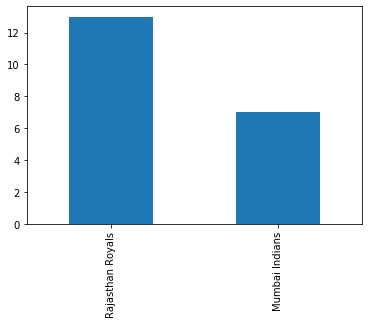

In [42]:
MI_RR['toss_winner'].value_counts().plot(kind='bar')

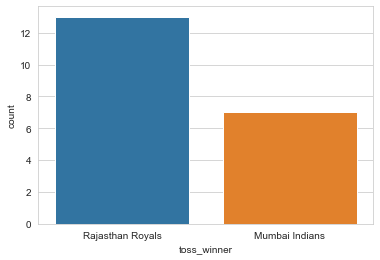

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=MI_RR)

# MI went on to win the match 4 times by  batting first and 6 times by Batting Second against RR .so total it is (MI=win-10,loss-10)whereas for RR they win the match 5 times by batting first and win 5 times by batting second against MI.so it is (RR=win-10,loss=10)

In [46]:
MI_RR.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel,NaN
512,513,2014,Mumbai,2014-05-25,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,K Srinath,RJ Tucker,NaN


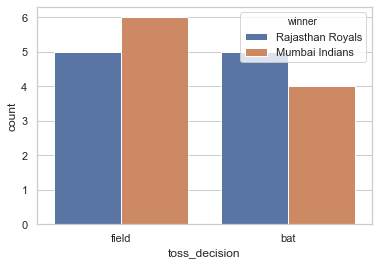

In [47]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=MI_RR)

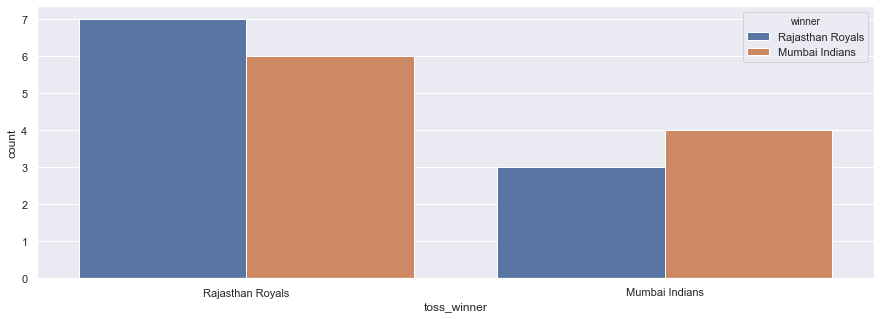

In [48]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=MI_RR)

In [49]:
print("No of times toss won by both teams:")
MI_RR['toss_winner'].value_counts()

No of times toss won by both teams:


Rajasthan Royals    13
Mumbai Indians       7
Name: toss_winner, dtype: int64

In [54]:
print("Mumbai win 10 times and Rajastan win 10 times from 20 matches")

Mumbai win 10 times and Rajastan win 10 times from 20 matches


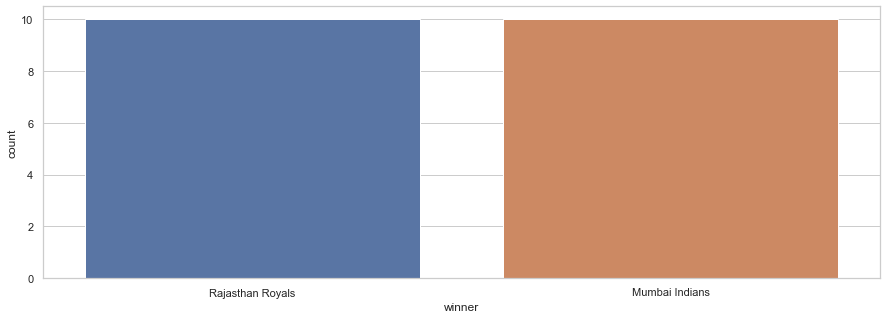

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=MI_RR)

# correlation between Columns in Matches Dataset

In [56]:
MI_RR.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.820812,NaN,-0.237880,0.139882
season,0.820812,1.000000,NaN,-0.099229,0.050018
dl_applied,NaN,NaN,NaN,NaN,NaN
win_by_runs,-0.237880,-0.099229,NaN,1.000000,-0.530733
win_by_wickets,0.139882,0.050018,NaN,-0.530733,1.000000


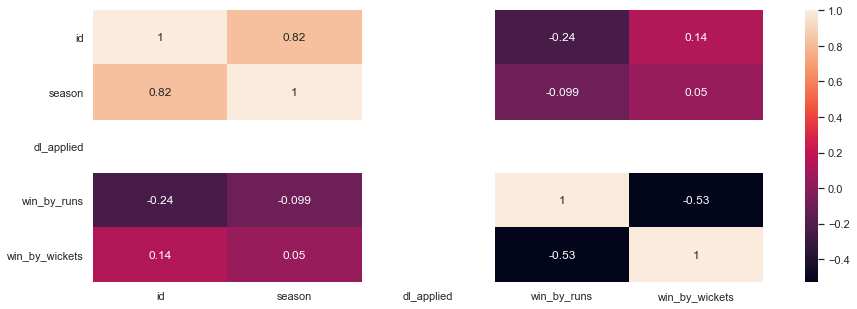

In [57]:
sns.heatmap(MI_RR.corr(),yticklabels=True,annot=True)

In [58]:
MI_RR['winner']=pd.get_dummies(MI_RR['winner'])

In [59]:
MI_RR.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
112,113,2008,Jaipur,2008-05-26,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,0,0,5,Sohail Tanvir,Sawai Mansingh Stadium,BF Bowden,K Hariharan,NaN
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,1,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN


# Using Sweetviz we can get details about the Matches

In [60]:
import sweetviz 
my_report=sweetviz.analyze([MI_RR,'MI_RR'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:18  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [61]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [62]:
Deliveries=pd.read_csv("deliveries.csv")

In [63]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [64]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [65]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Filtering the match details that only takes place between Mumbai Indians and  Rajastan Royals

In [68]:
Mumbai_Rajastan1=Deliveries.loc[(Deliveries['batting_team' ] =='Mumbai Indians' ) & (Deliveries['bowling_team'] == 'Rajasthan Royals')]

In [69]:
Mumbai_Rajastan1      

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20127,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20128,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20129,86,2,Mumbai Indians,Rajasthan Royals,1,3,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20130,86,2,Mumbai Indians,Rajasthan Royals,1,4,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
20131,86,2,Mumbai Indians,Rajasthan Royals,1,5,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173378,11327,1,Mumbai Indians,Rajasthan Royals,20,2,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173379,11327,1,Mumbai Indians,Rajasthan Royals,20,3,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173380,11327,1,Mumbai Indians,Rajasthan Royals,20,4,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173381,11327,1,Mumbai Indians,Rajasthan Royals,20,5,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [70]:
Mumbai_Rajastan2=Deliveries.loc[(Deliveries['bowling_team' ] =='Mumbai Indians' ) & (Deliveries['batting_team'] == 'Rajasthan Royals')]

In [71]:
Mumbai_Rajastan2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20024,86,1,Rajasthan Royals,Mumbai Indians,1,1,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20025,86,1,Rajasthan Royals,Mumbai Indians,1,2,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20026,86,1,Rajasthan Royals,Mumbai Indians,1,3,SA Asnodkar,GC Smith,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20027,86,1,Rajasthan Royals,Mumbai Indians,1,4,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20028,86,1,Rajasthan Royals,Mumbai Indians,1,5,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173496,11327,2,Rajasthan Royals,Mumbai Indians,19,6,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [72]:
Mumbai_Rajastan=Mumbai_Rajastan1.append(Mumbai_Rajastan2)

# Complete Details Of Mumbai vs Rajastan

In [73]:
Mumbai_Rajastan

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20127,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20128,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20129,86,2,Mumbai Indians,Rajasthan Royals,1,3,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20130,86,2,Mumbai Indians,Rajasthan Royals,1,4,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
20131,86,2,Mumbai Indians,Rajasthan Royals,1,5,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173496,11327,2,Rajasthan Royals,Mumbai Indians,19,6,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# using Match_id we can summarize that 20 matches were played between MI and KXIP

In [74]:
Mumbai_Rajastan['match_id'].value_counts()

176      254
549      253
113      253
160      251
219      251
377      250
501      250
447      248
456      248
7914     248
11318    242
403      241
319      241
11327    240
526      240
7940     239
267      234
513      215
299      203
86       202
Name: match_id, dtype: int64

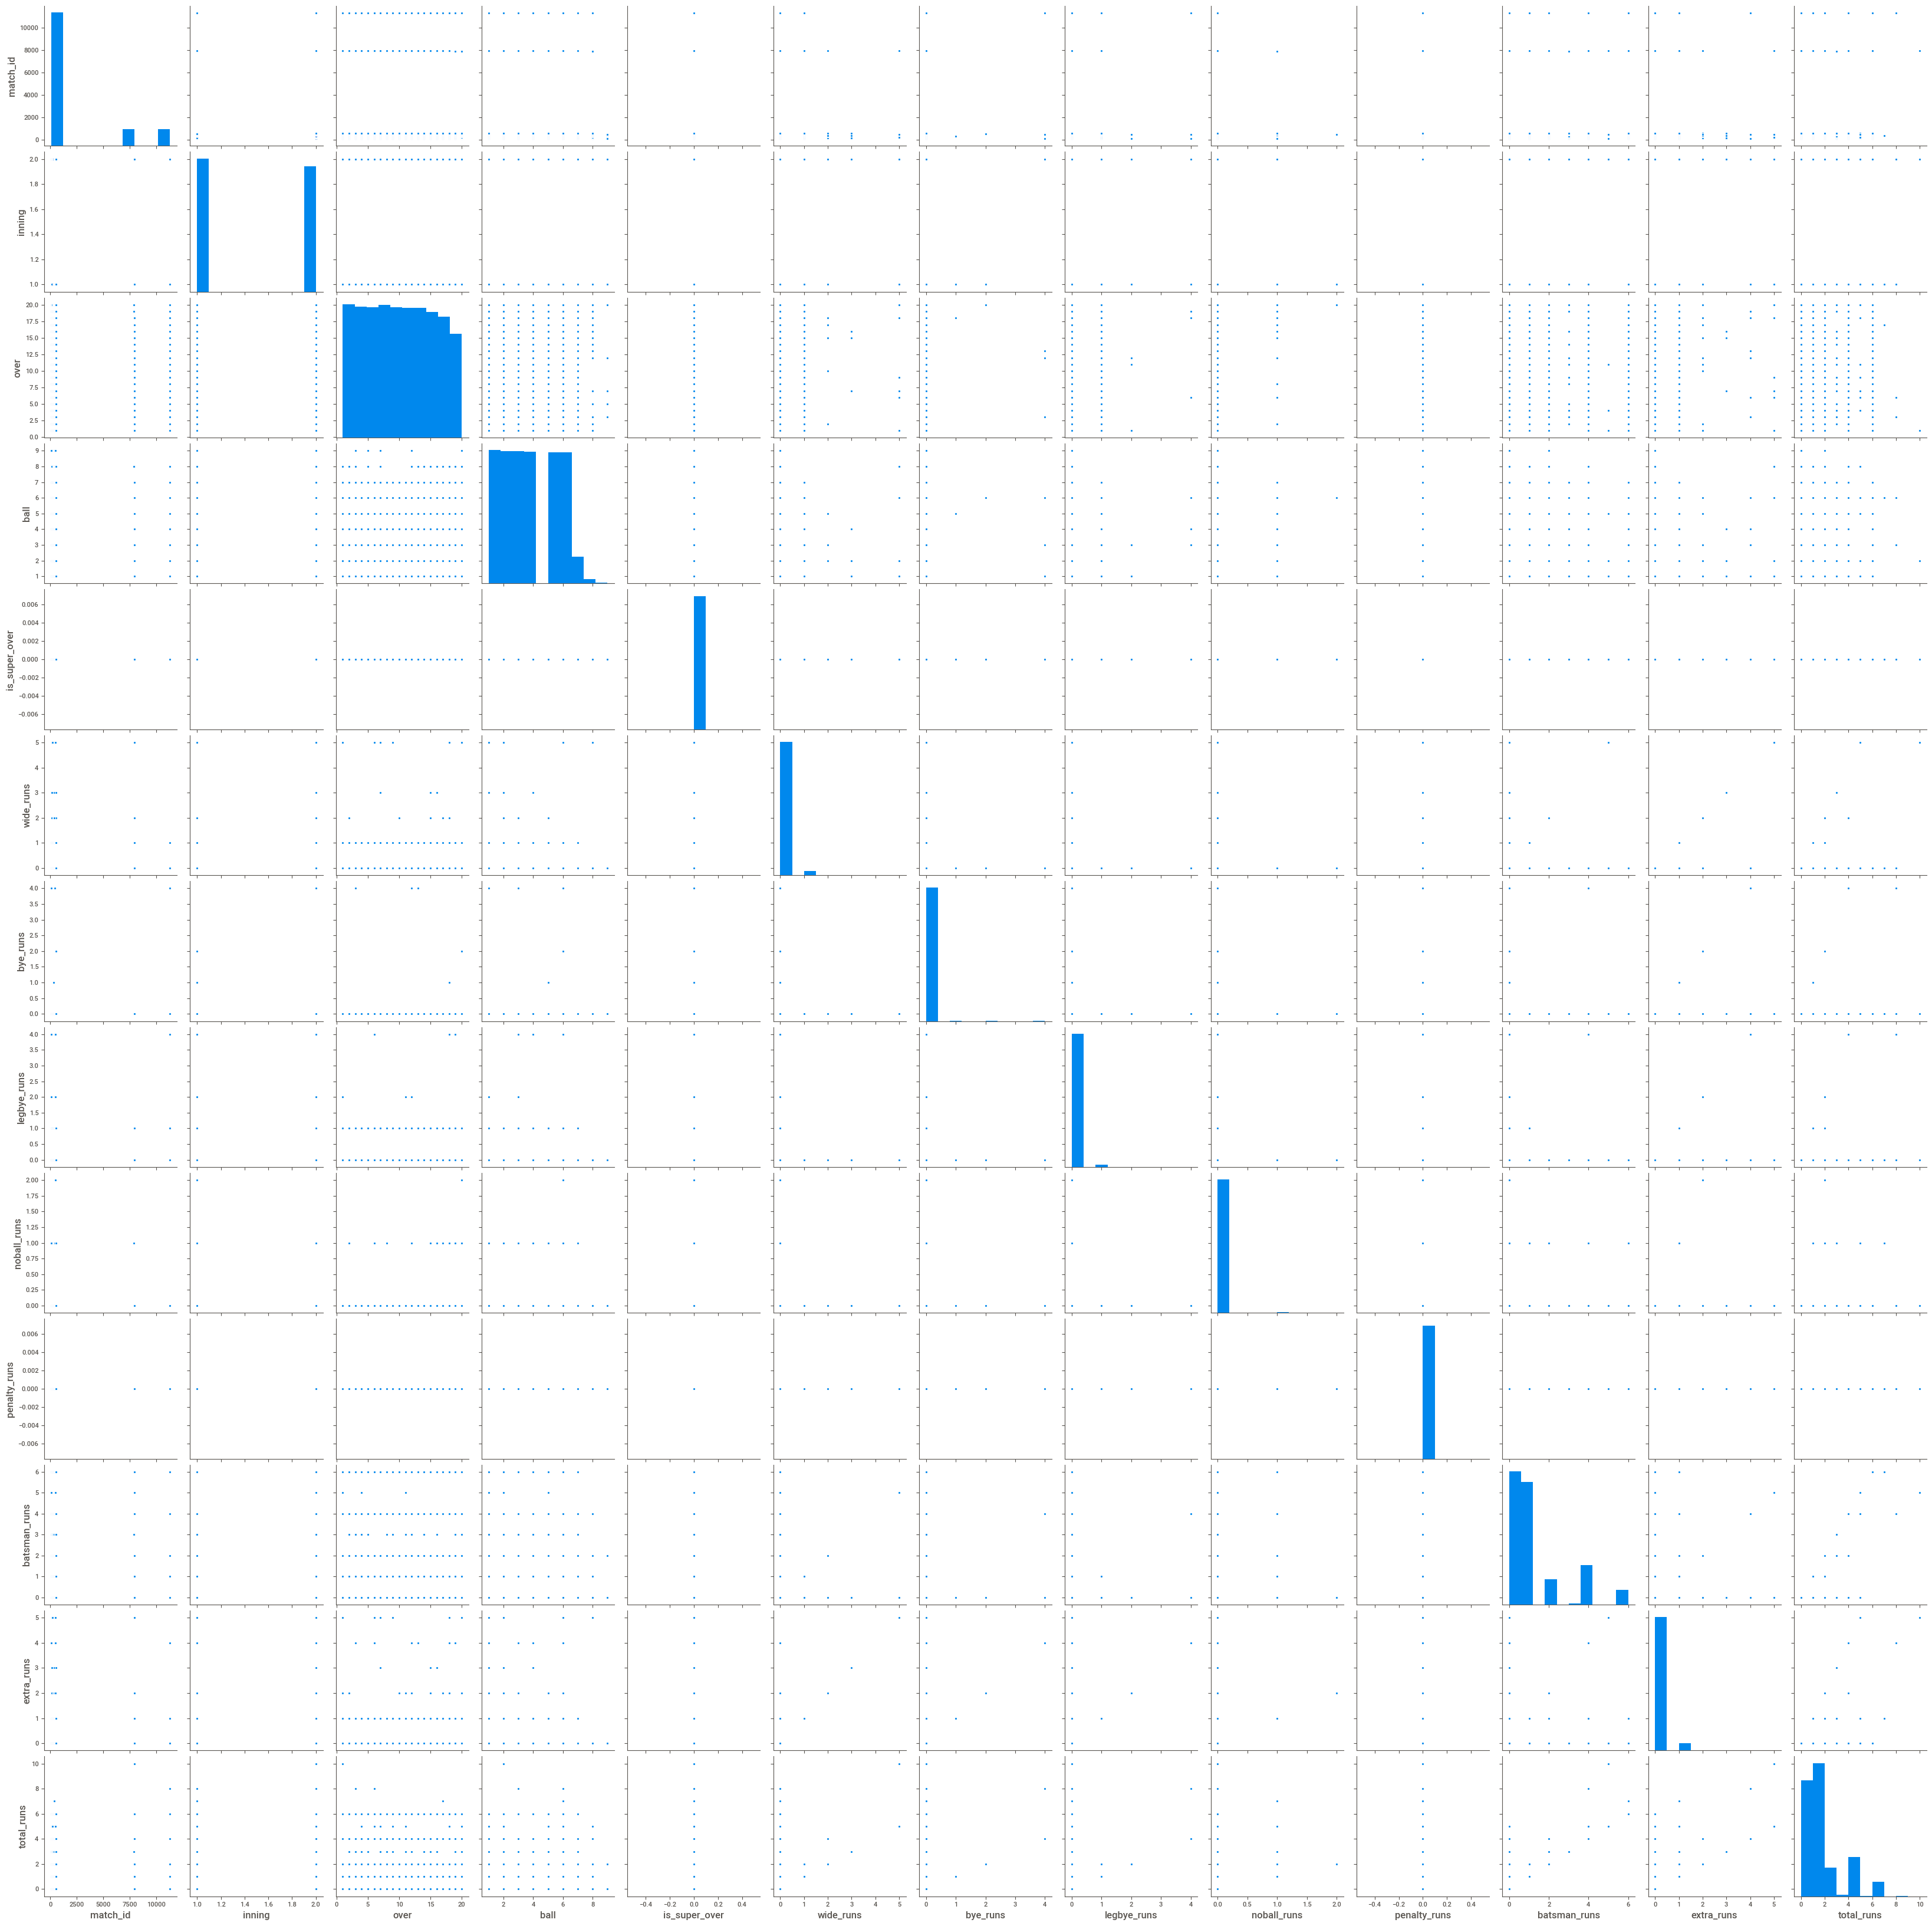

In [75]:
sns.pairplot(Mumbai_Rajastan)

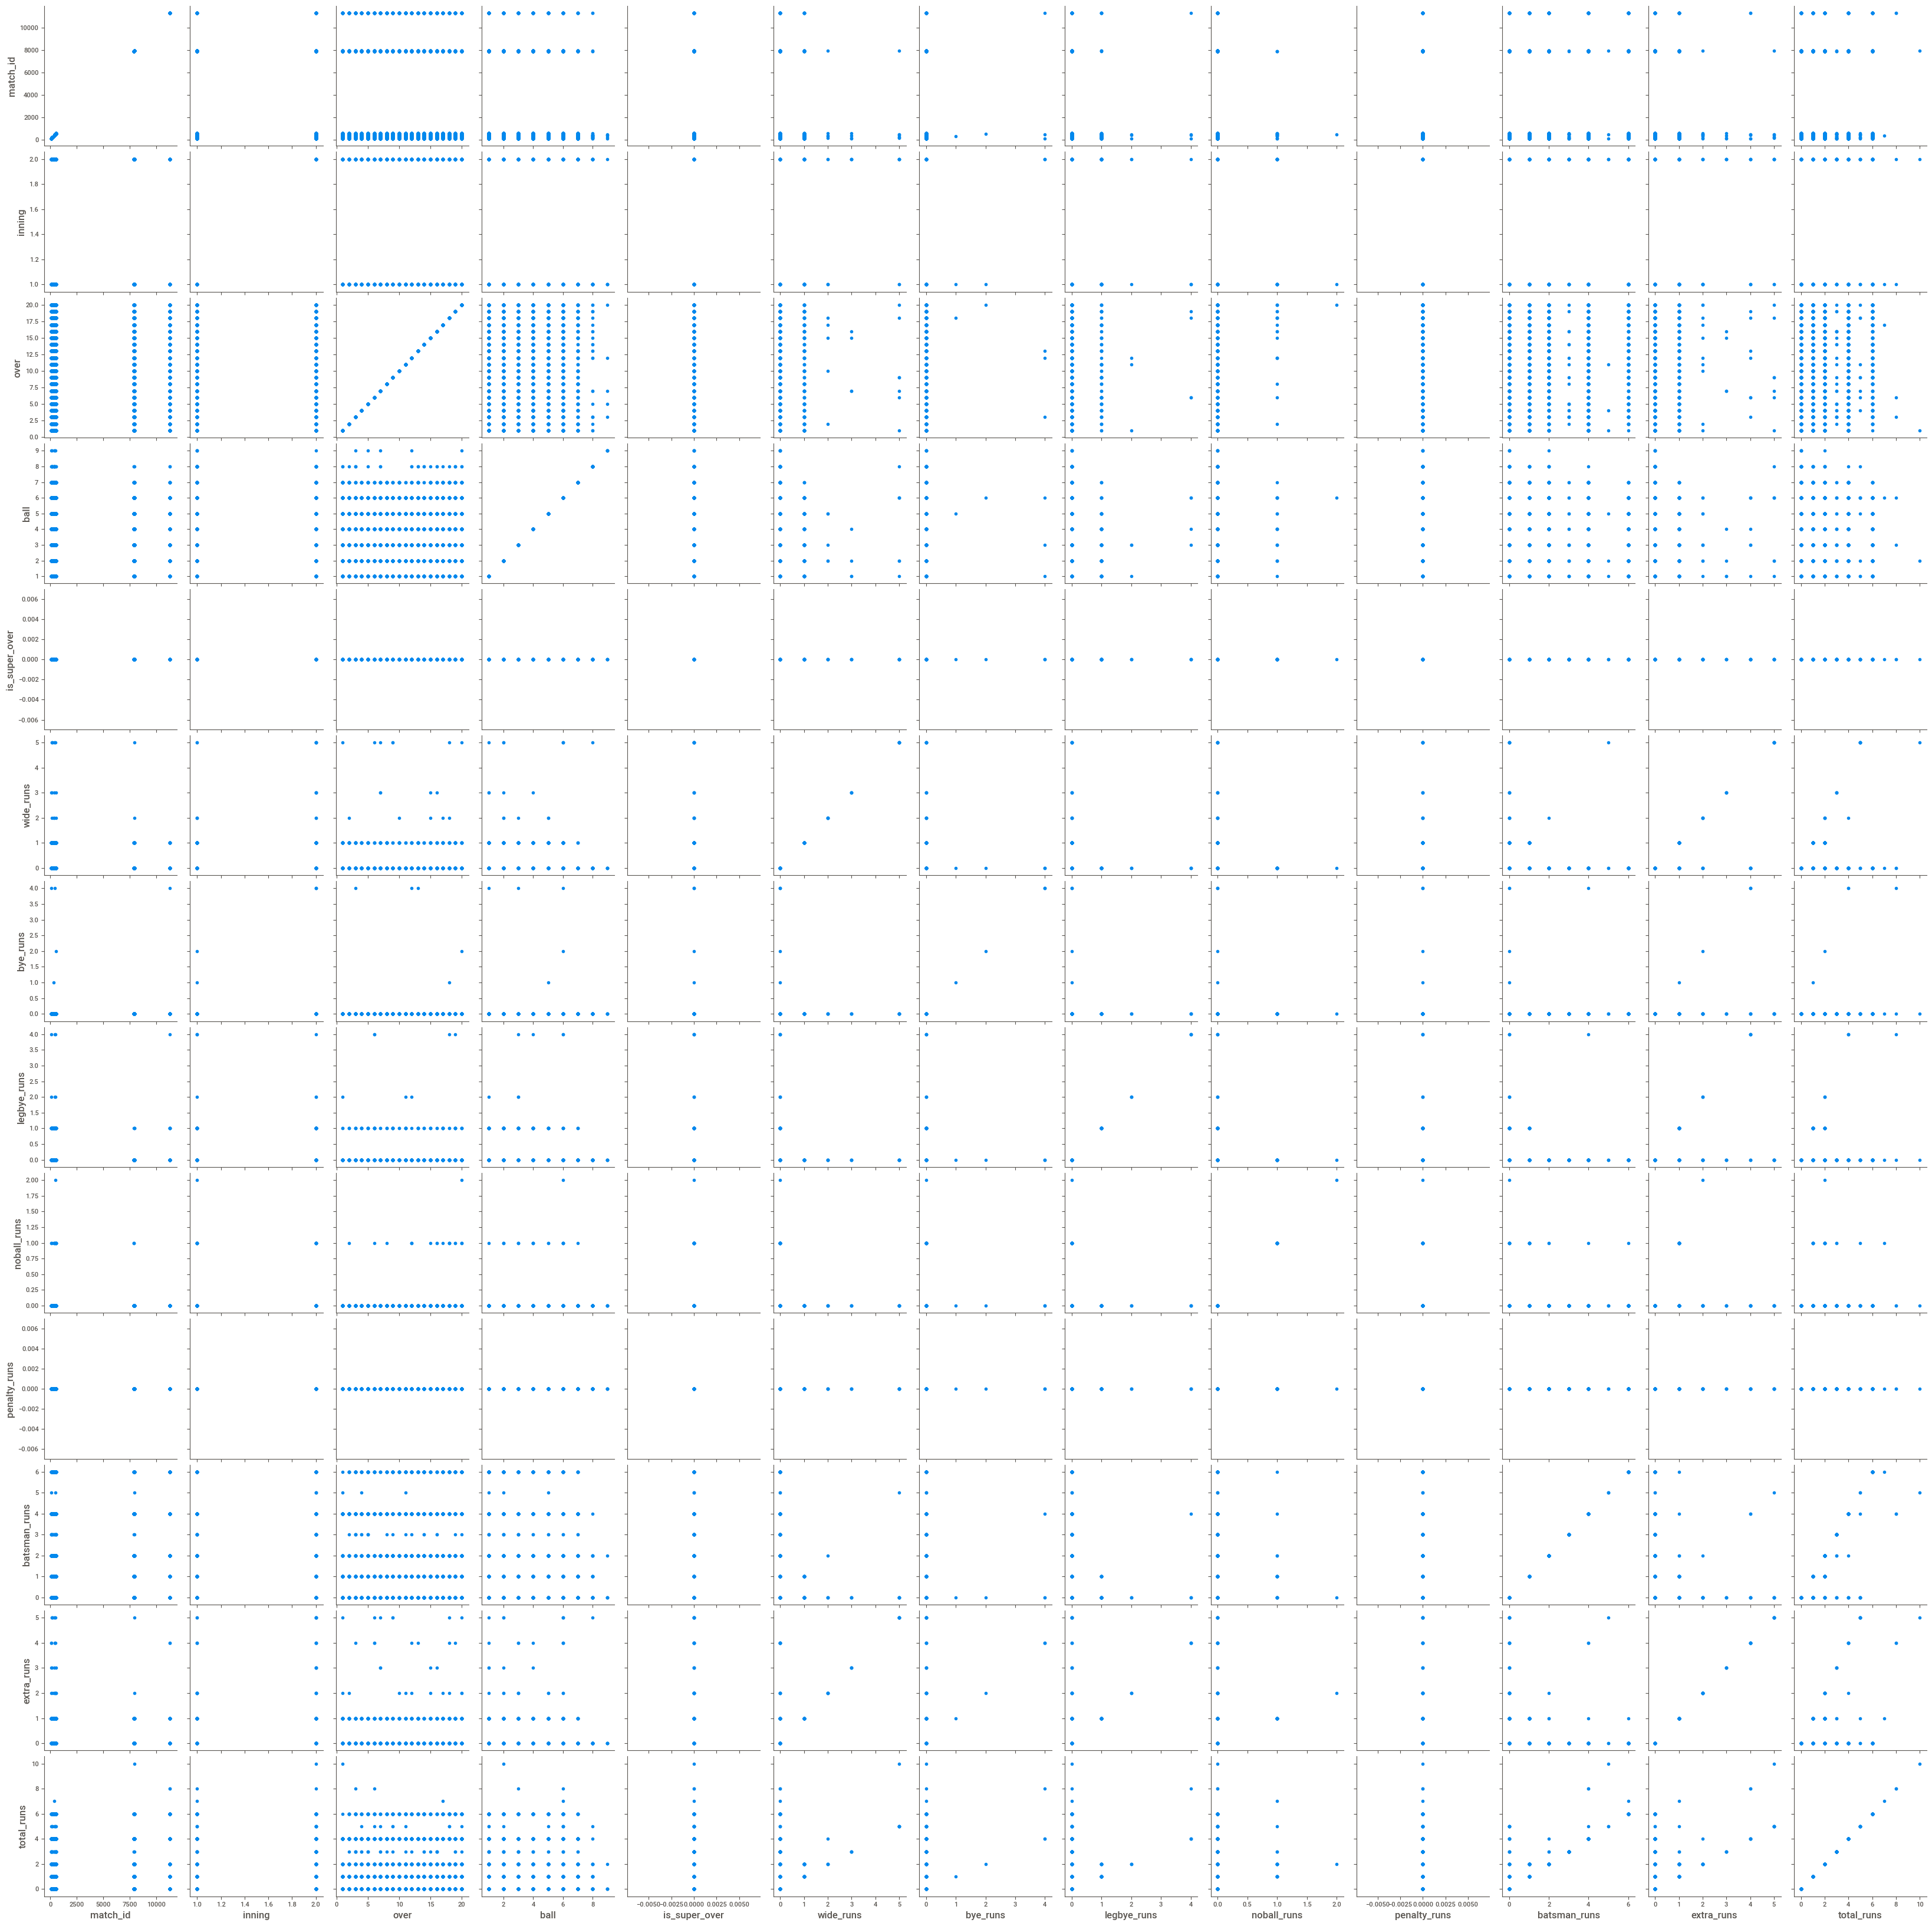

In [82]:
g=sns.PairGrid(Mumbai_Rajastan)
g.map(plt.scatter)

# It is difficult to interpret covariance.Let's try correlation

In [76]:
Mumbai_Rajastan.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.446055e+07,1.377730,283.130558,-72.285185,0.0,-26.297792,3.280598,-11.094940,-3.213827,0.0,308.226747,-37.325961,270.900786
inning,1.377730e+00,0.249805,-0.137157,-0.006581,0.0,0.002044,0.000986,-0.001849,-0.000035,0.0,0.000725,0.001146,0.001870
over,2.831306e+02,-0.137157,32.129708,-0.000716,0.0,0.006255,0.003529,0.011043,0.023266,0.0,0.903623,0.044092,0.947715
ball,-7.228519e+01,-0.006581,-0.000716,3.325281,0.0,0.001696,0.000517,-0.008193,0.003057,0.0,0.066365,-0.002923,0.063441
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,-2.629779e+01,0.002044,0.006255,0.001696,0.0,0.078245,-0.000137,-0.000942,-0.000192,0.0,-0.044322,0.076973,0.032651
bye_runs,3.280598e+00,0.000986,0.003529,0.000517,0.0,-0.000137,0.011027,-0.000067,-0.000014,0.0,-0.000618,0.010809,0.010191
legbye_runs,-1.109494e+01,-0.001849,0.011043,-0.008193,0.0,-0.000942,-0.000067,0.032235,-0.000094,0.0,-0.021711,0.031132,0.009421
noball_runs,-3.213827e+00,-0.000035,0.023266,0.003057,0.0,-0.000192,-0.000014,-0.000094,0.004771,0.0,-0.000949,0.004471,0.003522
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [77]:
Mumbai_Rajastan.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.000725,0.013135,-0.010424,NaN,-0.024723,0.008215,-0.016251,-0.012236,NaN,0.050342,-0.027944,0.044347
inning,0.000725,1.000000,-0.048413,-0.007221,NaN,0.014622,0.018790,-0.020610,-0.001025,NaN,0.000900,0.006526,0.002329
over,0.013135,-0.048413,1.000000,-0.000069,NaN,0.003945,0.005929,0.010851,0.059427,NaN,0.099011,0.022145,0.104080
ball,-0.010424,-0.007221,-0.000069,1.000000,NaN,0.003324,0.002701,-0.025025,0.024268,NaN,0.022603,-0.004564,0.021657
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,-0.024723,0.014622,0.003945,0.003324,NaN,1.000000,-0.004672,-0.018763,-0.009944,NaN,-0.098411,0.783393,0.072662
bye_runs,0.008215,0.018790,0.005929,0.002701,NaN,-0.004672,1.000000,-0.003553,-0.001883,NaN,-0.003657,0.293047,0.060413
legbye_runs,-0.016251,-0.020610,0.010851,-0.025025,NaN,-0.018763,-0.003553,1.000000,-0.007563,NaN,-0.075105,0.493639,0.032663
noball_runs,-0.012236,-0.001025,0.059427,0.024268,NaN,-0.009944,-0.001883,-0.007563,1.000000,NaN,-0.008534,0.184284,0.031743
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

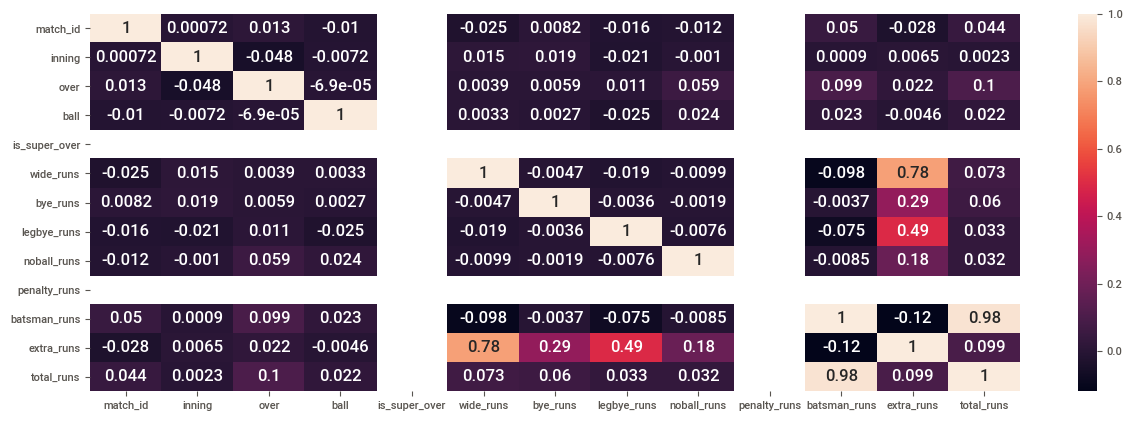

In [78]:
sns.heatmap(Mumbai_Rajastan.corr(),yticklabels=True,annot=True)

In [79]:
Mumbai_Rajastan.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,4803.000000,4803.000000,4803.000000,4803.000000,4803.0,4803.000000,4803.000000,4803.000000,4803.000000,4803.0,4803.000000,4803.000000,4803.000000
mean,2211.037893,1.484281,10.203623,3.634395,0.0,0.043931,0.003123,0.021445,0.004372,0.0,1.264626,0.072871,1.337497
std,3802.702818,0.499805,5.668307,1.823535,0.0,0.279722,0.105011,0.179540,0.069069,0.0,1.610090,0.351262,1.606417
min,86.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,219.000000,1.000000,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,447.000000,1.000000,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,549.000000,2.000000,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,2.000000
max,11327.000000,2.000000,20.000000,9.000000,0.0,5.000000,4.000000,4.000000,2.000000,0.0,6.000000,5.000000,10.000000


In [80]:
Mumbai_Rajastan

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20127,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20128,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20129,86,2,Mumbai Indians,Rajasthan Royals,1,3,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20130,86,2,Mumbai Indians,Rajasthan Royals,1,4,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
20131,86,2,Mumbai Indians,Rajasthan Royals,1,5,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173496,11327,2,Rajasthan Royals,Mumbai Indians,19,6,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# Batsman Intimidation Score

# quinton_de_kock_BIS

In [83]:
quinton_de_kock_BIS=Mumbai_Rajastan1.loc[(Mumbai_Rajastan1['batsman']=='Q de Kock')]    

In [84]:
quinton_de_kock_BIS.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
173346,11327,1,Mumbai Indians,Rajasthan Royals,15,2,Q de Kock,HH Pandya,S Gopal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173347,11327,1,Mumbai Indians,Rajasthan Royals,15,3,Q de Kock,HH Pandya,S Gopal,0,...,0,0,0,0,0,0,0,Q de Kock,caught,BA Stokes


In [85]:
quinton_de_kock_Total_score=quinton_de_kock_BIS['batsman_runs'].value_counts()

In [86]:
quinton_de_kock_Total_score

1    44
0    29
4    12
2    11
6     6
Name: batsman_runs, dtype: int64

In [90]:
quinton_de_kock_Total_Score=(1*44)+(2*11)+(4*12)+(6*6)

In [91]:
quinton_de_kock_Total_Score

150

In [92]:
quinton_de_kock_Boundary_runs=(4*12)+(6*6)

In [93]:
quinton_de_kock_Boundary_runs

84

In [94]:
quinton_de_kock_runs_scored_via_1s_2s=(1*44)+(2*11)

In [95]:
quinton_de_kock_runs_scored_via_1s_2s

66

In [98]:
Balls_Faced_By_quinton_de_kock=quinton_de_kock_BIS['ball'].value_counts()

In [99]:
Balls_Faced_By_quinton_de_kock

2    20
6    18
3    17
5    16
4    16
1    14
7     1
Name: ball, dtype: int64

In [108]:
Balls_Faced_By_quinton_de_Kock=20+18+17+16+16+14+1

In [112]:
Balls_Faced_By_quinton_de_Kock

102

In [100]:
quinton_de_kock_BIS['noball_runs'].value_counts()

0    102
Name: noball_runs, dtype: int64

In [344]:
BIS_Of_Quinton_De_Kock=(((quinton_de_kock_Total_Score)+(quinton_de_kock_Boundary_runs))-(quinton_de_kock_runs_scored_via_1s_2s*0.5))/Balls_Faced_By_quinton_de_Kock

In [345]:
BIS_Of_Quinton_De_Kock

1.9705882352941178

# BIS of Steve SmithSteve_Smith

In [117]:
Steve_Smith_BIS=Mumbai_Rajastan2.loc[(Mumbai_Rajastan2['batsman']=='SPD Smith')]    

In [118]:
Steve_Smith_BIS.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [157]:
Steve_Smith_Total_score=Steve_Smith_BIS['batsman_runs'].value_counts()

In [158]:
Steve_Smith_Total_score

1    60
0    43
2    17
4    16
6     2
3     1
Name: batsman_runs, dtype: int64

In [159]:
Steve_Smith_Total_Score=(1*60)+(2*17)+(4*16)+(6*2)+(3*1)

In [160]:
Steve_Smith_Total_Score

173

In [161]:
Steve_Smith_Boundary_runs=(4*16)+(6*2)

In [162]:
Steve_Smith_Boundary_runs

76

In [163]:
Steve_Smith_runs_scored_via_1s_2s=(1*60)+(2*17)+(3*1)

In [164]:
Steve_Smith_runs_scored_via_1s_2s

97

In [165]:
Balls_Faced_By_Steve_Smith=Steve_Smith_BIS['ball'].value_counts()

In [166]:
Balls_Faced_By_Steve_Smith

4    26
5    25
3    23
1    22
2    20
6    19
7     3
8     1
Name: ball, dtype: int64

In [167]:
Steve_Smith_BIS['noball_runs'].value_counts()

0    137
1      2
Name: noball_runs, dtype: int64

In [168]:
Balls_Faced_By_Steve_smith=139-2

In [169]:
Balls_Faced_By_Steve_smith

137

In [342]:
BIS_of_Steve_Smith=(((Steve_Smith_Total_Score)+(Steve_Smith_Boundary_runs))-(Steve_Smith_runs_scored_via_1s_2s*0.5))/Balls_Faced_By_Steve_smith

In [343]:
BIS_of_Steve_Smith

1.4635036496350364

# BIS of Kieron Pollard

In [204]:
KP_BIS=Mumbai_Rajastan1.loc[(Mumbai_Rajastan1['batsman']=='KA Pollard')]    

In [205]:
KP_BIS

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
51731,219,1,Mumbai Indians,Rajasthan Royals,13,4,KA Pollard,SR Tendulkar,SK Trivedi,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
51742,219,1,Mumbai Indians,Rajasthan Royals,15,2,KA Pollard,SR Tendulkar,SK Trivedi,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
51744,219,1,Mumbai Indians,Rajasthan Royals,15,4,KA Pollard,SR Tendulkar,SK Trivedi,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
51750,219,1,Mumbai Indians,Rajasthan Royals,16,4,KA Pollard,SR Tendulkar,AP Dole,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
51752,219,1,Mumbai Indians,Rajasthan Royals,16,6,KA Pollard,SR Tendulkar,AP Dole,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173355,11327,1,Mumbai Indians,Rajasthan Royals,16,5,KA Pollard,HH Pandya,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173357,11327,1,Mumbai Indians,Rajasthan Royals,17,1,KA Pollard,HH Pandya,JD Unadkat,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
173358,11327,1,Mumbai Indians,Rajasthan Royals,17,2,KA Pollard,HH Pandya,JD Unadkat,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173360,11327,1,Mumbai Indians,Rajasthan Royals,17,4,KA Pollard,HH Pandya,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [206]:
KP_BIS.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
173360,11327,1,Mumbai Indians,Rajasthan Royals,17,4,KA Pollard,HH Pandya,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173361,11327,1,Mumbai Indians,Rajasthan Royals,17,5,KA Pollard,HH Pandya,JD Unadkat,0,...,0,0,0,0,0,0,0,KA Pollard,bowled,NaN


In [207]:
KP_Total_score=KP_BIS['batsman_runs'].value_counts()

In [208]:
KP_Total_score

0    85
1    73
4    22
6    17
2    16
Name: batsman_runs, dtype: int64

In [209]:
KP_Total_Score=(1*73)+(4*22)+(6*17)+(2*16)

In [219]:
KP_Total_Score

295

In [210]:
KP_Boundary_runs=(4*22)+(6*17)

In [211]:
KP_Boundary_runs

190

In [212]:
KP_runs_scored_via_1s_2s=(1*73)+(2*16)

In [213]:
KP_runs_scored_via_1s_2s

105

In [214]:
KP_BIS['ball'].value_counts()

4    41
5    37
6    34
3    32
1    32
2    31
7     5
8     1
Name: ball, dtype: int64

In [215]:
KP_BIS['noball_runs'].value_counts()

0    211
1      2
Name: noball_runs, dtype: int64

In [216]:
Balls_Faced_By_KP=213-2

In [340]:
BIS_of_BIS_of_KP=(((KP_Total_Score)+(KP_Boundary_runs))-(KP_runs_scored_via_1s_2s*0.5))/Balls_Faced_By_KP

In [341]:
BIS_of_BIS_of_KP

2.0497630331753554

# BIS of Ishan Kishaan

In [222]:
Ishan_Kishan_BIS=Mumbai_Rajastan1.loc[(Mumbai_Rajastan1['batsman']=='Ishan Kishan')]    

In [223]:
Ishan_Kishan_BIS.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
171184,11318,1,Mumbai Indians,Rajasthan Royals,20,1,Ishan Kishan,HH Pandya,JD Unadkat,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
171185,11318,1,Mumbai Indians,Rajasthan Royals,20,2,Ishan Kishan,HH Pandya,JD Unadkat,0,...,0,0,0,0,0,0,0,Ishan Kishan,caught,JC Buttler


In [227]:
Ishan_Kishan_Total_score=Ishan_Kishan_BIS['batsman_runs'].value_counts()

In [228]:
Ishan_Kishan_Total_score

1    21
0    20
4     6
2     6
6     3
Name: batsman_runs, dtype: int64

In [229]:
Ishan_Kishan_Total_Score=(1*21)+(4*6)+(2*6)+(6*3)

In [280]:
Ishan_Kishan_Total_Score

75

In [232]:
Ishan_Kishan_Total_Score

75

In [230]:
Ishan_Kishan_Boundary_runs=(4*6)+(6*3)

In [231]:
Ishan_Kishan_Boundary_runs

42

In [233]:
Ishan_Kishan_runs_scored_via_1s_2s=(1*21)+(2*6)

In [234]:
Ishan_Kishan_runs_scored_via_1s_2s

33

In [237]:
Ishan_Kishan_BIS['ball'].value_counts()

6    12
1    10
3     9
2     9
5     8
4     7
7     1
Name: ball, dtype: int64

In [238]:
Ishan_Kishan_BIS['noball_runs'].value_counts()

0    56
Name: noball_runs, dtype: int64

In [239]:
Balls_Faced_By_Ishan_Kishan=56

In [337]:
BIS_of_BIS_of_Ishan_Kishan=(((Ishan_Kishan_Total_Score)+(Ishan_Kishan_Boundary_runs))-(Ishan_Kishan_runs_scored_via_1s_2s*0.5))/Balls_Faced_By_Ishan_Kishan

In [338]:
BIS_of_BIS_of_Ishan_Kishan

1.7946428571428572

# # BIS of Sanju samson

In [244]:
Sanju_Samson_BIS=Mumbai_Rajastan2.loc[(Mumbai_Rajastan2['batsman']=='SV Samson')] 

In [245]:
Sanju_Samson_BIS.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
173424,11327,2,Rajasthan Royals,Mumbai Indians,7,6,SV Samson,SPD Smith,M Markande,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173426,11327,2,Rajasthan Royals,Mumbai Indians,8,2,SV Samson,SPD Smith,RD Chahar,0,...,0,0,0,0,0,0,0,SV Samson,caught,KA Pollard


In [247]:
Sanju_Samson_Total_score=Sanju_Samson_BIS['batsman_runs'].value_counts()

In [248]:
Sanju_Samson_Total_score

1    85
0    72
4    33
2    21
6    10
3     2
Name: batsman_runs, dtype: int64

In [250]:
Sanju_Samson_Total_Score=(1*85)+(4*33)+(2*21)+(6*10)+(3*2)

In [279]:
Sanju_Samson_Total_Score

325

In [251]:
Sanju_Samson_Boundary_runs=(4*33)+(6*10)

In [252]:
Sanju_Samson_Boundary_runs

192

In [253]:
Sanju_Samson_runs_scored_via_1s_2s=(1*85)+(2*21)

In [254]:
Sanju_Samson_runs_scored_via_1s_2s

127

In [255]:
Sanju_Samson_BIS['ball'].value_counts()

6    42
5    38
2    36
4    35
3    35
1    33
7     3
8     1
Name: ball, dtype: int64

In [256]:
Sanju_Samson_BIS['noball_runs'].value_counts()

0    222
1      1
Name: noball_runs, dtype: int64

In [257]:
Balls_Faced_By_Sanju_Samson=223-1

In [333]:
BIS_of_BIS_of_Sanju_Samson=(((Sanju_Samson_Total_Score)+(Sanju_Samson_Boundary_runs))-(Sanju_Samson_runs_scored_via_1s_2s*0.5))/Balls_Faced_By_Sanju_Samson

In [334]:
BIS_of_BIS_of_Sanju_Samson

2.0427927927927927

# # BIS of Hardik Pandiya

In [261]:
Hardik_Pandiya_BIS=Mumbai_Rajastan1.loc[(Mumbai_Rajastan1['batsman']=='HH Pandya')] 

In [262]:
Hardik_Pandiya_BIS.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
173375,11327,1,Mumbai Indians,Rajasthan Royals,19,7,HH Pandya,BCJ Cutting,JD Unadkat,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173377,11327,1,Mumbai Indians,Rajasthan Royals,20,1,HH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,0,0,0,HH Pandya,lbw,NaN


In [263]:
Hardik_Pandiya_Total_score=Hardik_Pandiya_BIS['batsman_runs'].value_counts()

In [264]:
Hardik_Pandiya_Total_score

1    25
0    13
4     7
6     6
2     4
Name: batsman_runs, dtype: int64

In [265]:
Hardik_Pandiya_Total_Score=(1*25)+(4*7)+(6*6)+(2*4)

In [278]:
Hardik_Pandiya_Total_Score

97

In [266]:
Hardik_Pandiya_Boundary_runs=(6*6)+(4*7)

In [267]:
Hardik_Pandiya_Boundary_runs

64

In [270]:
Hardik_Pandiya_runs_scored_via_1s_2s=(1*25)+(2*4)

In [272]:
Hardik_Pandiya_runs_scored_via_1s_2s

33

In [273]:
Hardik_Pandiya_BIS['ball'].value_counts()

3    11
1    10
4     8
6     7
2     7
5     6
7     5
8     1
Name: ball, dtype: int64

In [274]:
Hardik_Pandiya_BIS['noball_runs'].value_counts()

0    55
Name: noball_runs, dtype: int64

In [275]:
Balls_Faced_By_Hardik_Pandiya=55

In [331]:
BIS_of_BIS_of_Hardik_Pandiya=(((Hardik_Pandiya_Total_Score)+(Hardik_Pandiya_Boundary_runs))-(Hardik_Pandiya_runs_scored_via_1s_2s*0.5))/Balls_Faced_By_Hardik_Pandiya

In [332]:
BIS_of_BIS_of_Hardik_Pandiya

2.6272727272727274

In [346]:
print("BIS Of Quinton De Kock is",  BIS_Of_Quinton_De_Kock )
print("BIS of Steve Smith is",  BIS_of_Steve_Smith )
print("BIS of BIS of Kieron Pollard is",  BIS_of_BIS_of_KP )
print("BIS of BIS of Ishan Kishan is",  BIS_of_BIS_of_Ishan_Kishan )
print("BIS of BIS of Sanju Samson",  BIS_of_BIS_of_Sanju_Samson)
print("BIS of BIS of Hardik Pandiya",  BIS_of_BIS_of_Hardik_Pandiya)

BIS Of Quinton De Kock is 1.9705882352941178
BIS of Steve Smith is 1.4635036496350364
BIS of BIS of Kieron Pollard is 2.0497630331753554
BIS of BIS of Ishan Kishan is 1.7946428571428572
BIS of BIS of Sanju Samson 2.0427927927927927
BIS of BIS of Hardik Pandiya 2.6272727272727274


# Bowler Lethality Score(BLS)

# BLS OF JOFRA ARCHER

In [288]:
BLS_Jofra_Archer=Mumbai_Rajastan1.loc[(Mumbai_Rajastan1['bowler']=='J Archer')]

In [289]:
BLS_Jofra_Archer

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
155172,7914,1,Mumbai Indians,Rajasthan Royals,4,1,AS Yadav,Ishan Kishan,J Archer,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
155173,7914,1,Mumbai Indians,Rajasthan Royals,4,2,Ishan Kishan,AS Yadav,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155174,7914,1,Mumbai Indians,Rajasthan Royals,4,3,Ishan Kishan,AS Yadav,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
155175,7914,1,Mumbai Indians,Rajasthan Royals,4,4,AS Yadav,Ishan Kishan,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155176,7914,1,Mumbai Indians,Rajasthan Royals,4,5,AS Yadav,Ishan Kishan,J Archer,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173378,11327,1,Mumbai Indians,Rajasthan Royals,20,2,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173379,11327,1,Mumbai Indians,Rajasthan Royals,20,3,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173380,11327,1,Mumbai Indians,Rajasthan Royals,20,4,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173381,11327,1,Mumbai Indians,Rajasthan Royals,20,5,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Jofra Archer played only 4matches

In [300]:
BLS_Jofra_Archer['match_id'].value_counts()

7940     27
11318    25
7914     24
11327    24
Name: match_id, dtype: int64

In [304]:
BLS_Jofra_Archer['dismissal_kind'].value_counts()

caught    6
bowled    2
lbw       1
Name: dismissal_kind, dtype: int64

In [316]:
Wickets_taken_in_a_match_JF=(6+2+1)/4
Wickets_taken_in_a_match_JF

2.25

In [307]:
BLS_Jofra_Archer['ball'].value_counts()

6    16
5    16
4    16
3    16
2    16
1    16
7     3
8     1
Name: ball, dtype: int64

In [329]:
Total_balls_bowled_by_archer=(100-4)/4
Total_balls_bowled_by_archer

24.0

In [317]:
Dot_balls_bowled_by_JA=45/4
Dot_balls_bowled_by_JA

11.25

In [292]:
BLS_Jofra_Archer['noball_runs'].value_counts()

0    100
Name: noball_runs, dtype: int64

In [293]:
BLS_Jofra_Archer['wide_runs'].value_counts()

0    96
1     4
Name: wide_runs, dtype: int64

In [310]:
BLS_Jofra_Archer['batsman_runs'].value_counts()

0    45
1    37
4     8
2     6
6     3
3     1
Name: batsman_runs, dtype: int64

In [388]:
Dot_balls_bowled_by_JA=BLS_Jofra_Archer.loc[(BLS_Jofra_Archer['total_runs']==0)&(BLS_Jofra_Archer['batsman_runs']==0)]
len(Dot_balls_bowled_by_JA)

45

In [389]:

Dot_balls_Bowled_by_JA=45/4
Dot_balls_Bowled_by_JA

11.25

In [311]:
Boundary_runs_JA=((4*8)+(6*3))/4

In [313]:
Boundary_runs_JA

12.5

In [319]:
No_Of_Boundaries_JA=(8+3)/4
No_Of_Boundaries_JA

2.75

In [324]:
Wickets_taken_in_a_match_JF+(Dot_balls_Bowled_by_JA*2)

24.75

In [325]:
Boundary_runs_JA/No_Of_Boundaries_JA

4.545454545454546

In [326]:
Total_balls_bowled_by_archer-(Dot_balls_Bowled_by_JA*2.5)

-4.125

In [327]:
BLS_Of_Jofra_Archer=(24.75-4.54545454)/(-4.125)

In [328]:
BLS_Of_Jofra_Archer

-4.898071626666666

# BLS of Trent Boult

In [349]:
BLS_Trent_Boult=Deliveries.loc[(Deliveries['bowler']=='TA Boult')]
BLS_Trent_Boult.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
495,3,1,Gujarat Lions,Kolkata Knight Riders,1,1,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
496,3,1,Gujarat Lions,Kolkata Knight Riders,1,2,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


# Trent boult played 33 matches

In [398]:
len(BLS_Trent_Boult['match_id'].value_counts())

33

In [351]:
BLS_Trent_Boult['dismissal_kind'].value_counts()

caught     29
bowled      8
run out     3
lbw         1
Name: dismissal_kind, dtype: int64

In [363]:
Wickets_taken_in_a_match_TB=38/33
Wickets_taken_in_a_match_TB

1.1515151515151516

In [364]:
BLS_Trent_Boult['ball'].value_counts()

5    128
4    128
3    128
2    128
1    128
6    126
7     34
8      2
Name: ball, dtype: int64

In [368]:
BLS_Trent_Boult['noball_runs'].value_counts()

0    801
1      1
Name: noball_runs, dtype: int64

In [367]:
BLS_Trent_Boult['wide_runs'].value_counts()

0    766
1     33
2      3
Name: wide_runs, dtype: int64

In [370]:
Total_balls_bowled_by_TB=(802-36-1)/33
Total_balls_bowled_by_TB

23.181818181818183

In [372]:
Boundary_runs_TB=((128*4)+(6*126))/33
Boundary_runs_TB

38.42424242424242

In [374]:
No_Of_Boundaries_TB=(128+126)/33
No_Of_Boundaries_TB

7.696969696969697

In [382]:
BLS_Trent_Boult['batsman_runs'].value_counts()

0    318
1    269
4    126
2     47
6     38
3      3
5      1
Name: batsman_runs, dtype: int64

In [387]:
Dot_balls_bowled_by_TB=BLS_Trent_Boult.loc[(BLS_Trent_Boult['total_runs']==0)&(BLS_Trent_Boult['batsman_runs']==0)]
len(Dot_balls_bowled_by_TB)

290

In [390]:
Dot_balls_bowled_by_TB['batsman_runs'].value_counts()

0    290
Name: batsman_runs, dtype: int64

In [391]:
Dot_balls_Bowled_by_TB=290/33
Dot_balls_Bowled_by_TB

8.787878787878787

In [392]:
Wickets_taken_in_a_match_TB+(Dot_balls_Bowled_by_TB*2)

18.727272727272727

In [393]:
Boundary_runs_TB/No_Of_Boundaries_TB

4.992125984251968

In [395]:
Total_balls_bowled_by_TB-(Dot_balls_Bowled_by_TB*2.5)

1.2121212121212146

In [396]:
BLS_Of_Trent_Boult=(18.727272727272727-4.992125984251968)/1.2121212121212146

In [397]:
BLS_Of_Trent_Boult

11.331496062992104

# BLS OF JASPRIT BUMRAH

In [399]:
BLS_Jasprit_Bumrah=Mumbai_Rajastan2.loc[(Mumbai_Rajastan2['bowler']=='JJ Bumrah')]
BLS_Jasprit_Bumrah

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
118789,501,2,Rajasthan Royals,Mumbai Indians,1,1,KK Nair,UBT Chand,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
118790,501,2,Rajasthan Royals,Mumbai Indians,1,2,UBT Chand,KK Nair,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118791,501,2,Rajasthan Royals,Mumbai Indians,1,3,UBT Chand,KK Nair,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118792,501,2,Rajasthan Royals,Mumbai Indians,1,4,UBT Chand,KK Nair,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118793,501,2,Rajasthan Royals,Mumbai Indians,1,5,UBT Chand,KK Nair,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173492,11327,2,Rajasthan Royals,Mumbai Indians,19,2,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [440]:
len(BLS_Jasprit_Bumrah['match_id'].value_counts())

6

In [441]:
BLS_Jasprit_Bumrah['dismissal_kind'].value_counts()

caught    4
lbw       2
bowled    1
Name: dismissal_kind, dtype: int64

In [442]:
Wickets_taken_in_a_match_JB=7/6
Wickets_taken_in_a_match_JB

1.1666666666666667

In [443]:
BLS_Jasprit_Bumrah['ball'].value_counts()

6    22
5    22
4    22
3    22
2    22
1    22
7     5
Name: ball, dtype: int64

In [444]:
BLS_Jasprit_Bumrah['noball_runs'].value_counts()

0    136
1      1
Name: noball_runs, dtype: int64

In [445]:
BLS_Jasprit_Bumrah['wide_runs'].value_counts()

0    133
1      3
5      1
Name: wide_runs, dtype: int64

In [446]:
Total_balls_bowled_by_JB=(137-1-4)/6
Total_balls_bowled_by_JB

22.0

In [447]:
Boundary_runs_JB=((15*4)+(6*3))/6
Boundary_runs_JB

13.0

In [448]:
No_Of_Boundaries_JB=(15+3)/6
No_Of_Boundaries_JB

3.0

In [449]:
BLS_Jasprit_Bumrah['batsman_runs'].value_counts()

0    54
1    53
4    15
2    11
6     3
5     1
Name: batsman_runs, dtype: int64

In [450]:
Dot_balls_bowled_by_JB=BLS_Jasprit_Bumrah.loc[(BLS_Jasprit_Bumrah['total_runs']==0)&(BLS_Jasprit_Bumrah['batsman_runs']==0)]
Dot_balls_bowled_by_JB

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
118790,501,2,Rajasthan Royals,Mumbai Indians,1,2,UBT Chand,KK Nair,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118791,501,2,Rajasthan Royals,Mumbai Indians,1,3,UBT Chand,KK Nair,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118792,501,2,Rajasthan Royals,Mumbai Indians,1,4,UBT Chand,KK Nair,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118898,501,2,Rajasthan Royals,Mumbai Indians,18,2,BJ Hodge,JP Faulkner,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118903,501,2,Rajasthan Royals,Mumbai Indians,18,7,BJ Hodge,JP Faulkner,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
118914,501,2,Rajasthan Royals,Mumbai Indians,20,5,R Bhatia,JP Faulkner,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
121518,513,1,Rajasthan Royals,Mumbai Indians,2,1,SR Watson,SV Samson,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
121519,513,1,Rajasthan Royals,Mumbai Indians,2,2,SR Watson,SV Samson,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
121520,513,1,Rajasthan Royals,Mumbai Indians,2,3,SR Watson,SV Samson,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
121521,513,1,Rajasthan Royals,Mumbai Indians,2,4,SR Watson,SV Samson,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [451]:
Dot_balls_bowled_by_JB['batsman_runs'].value_counts()

0    51
Name: batsman_runs, dtype: int64

In [452]:
Dot_balls_Bowled_by_JB=51/6
Dot_balls_Bowled_by_JB

8.5

In [453]:
Wickets_taken_in_a_match_JB+(Dot_balls_Bowled_by_JB*2)

18.166666666666668

In [454]:
Boundary_runs_JB/No_Of_Boundaries_JB

4.333333333333333

In [455]:
Total_balls_bowled_by_JB-(Dot_balls_Bowled_by_JB*2.5)

0.75

In [456]:
BLS_Of_Jasprit_Bumrah=(18.166666666666668-4.333333333333333)/110.75

In [457]:
BLS_Of_Jasprit_Bumrah

0.12490594431903689

# BLS OF RAHUL CHAHAR

In [512]:
BLS_Rahul_Chahar=Deliveries.loc[(Deliveries['bowler']=='RD Chahar')]
BLS_Rahul_Chahar

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
888,4,2,Kings XI Punjab,Rising Pune Supergiant,9,1,AR Patel,HM Amla,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
889,4,2,Kings XI Punjab,Rising Pune Supergiant,9,2,HM Amla,AR Patel,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
890,4,2,Kings XI Punjab,Rising Pune Supergiant,9,3,HM Amla,AR Patel,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
891,4,2,Kings XI Punjab,Rising Pune Supergiant,9,4,HM Amla,AR Patel,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
892,4,2,Kings XI Punjab,Rising Pune Supergiant,9,5,AR Patel,HM Amla,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179037,11415,2,Chennai Super Kings,Mumbai Indians,14,2,DJ Bravo,SR Watson,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179038,11415,2,Chennai Super Kings,Mumbai Indians,14,3,SR Watson,DJ Bravo,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179039,11415,2,Chennai Super Kings,Mumbai Indians,14,4,DJ Bravo,SR Watson,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179040,11415,2,Chennai Super Kings,Mumbai Indians,14,5,SR Watson,DJ Bravo,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [542]:
len(BLS_Rahul_Chahar['match_id'].value_counts())

15

In [543]:
BLS_Rahul_Chahar['dismissal_kind'].value_counts()

caught     9
bowled     3
stumped    2
lbw        1
Name: dismissal_kind, dtype: int64

In [544]:
Wickets_taken_in_a_match_RC=4/15
Wickets_taken_in_a_match_RC

0.26666666666666666

In [545]:
BLS_Rahul_Chahar['ball'].value_counts()

6    54
5    54
4    54
3    54
2    54
1    54
7     7
9     1
8     1
Name: ball, dtype: int64

In [546]:
BLS_Rahul_Chahar['noball_runs'].value_counts()

0    333
Name: noball_runs, dtype: int64

In [547]:
BLS_Rahul_Chahar['wide_runs'].value_counts()

0    324
1      9
Name: wide_runs, dtype: int64

In [548]:
Total_balls_bowled_by_RC=48/15
Total_balls_bowled_by_RC

3.2

In [549]:
Boundary_runs_RC=((4*3)+(6*4))/15
Boundary_runs_RC

2.4

In [550]:
No_Of_Boundaries_RC=(6+4)/15
No_Of_Boundaries_RC

0.6666666666666666

In [551]:
BLS_Rahul_Chahar['batsman_runs'].value_counts()

0    144
1    136
4     23
6     19
2     11
Name: batsman_runs, dtype: int64

In [552]:
Dot_balls_bowled_by_RC=BLS_Rahul_Chahar.loc[(BLS_Rahul_Chahar['total_runs']==0)&(BLS_Rahul_Chahar['batsman_runs']==0)]
Dot_balls_bowled_by_RC

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
889,4,2,Kings XI Punjab,Rising Pune Supergiant,9,2,HM Amla,AR Patel,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
890,4,2,Kings XI Punjab,Rising Pune Supergiant,9,3,HM Amla,AR Patel,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
905,4,2,Kings XI Punjab,Rising Pune Supergiant,11,6,HM Amla,AR Patel,RD Chahar,0,...,0,0,0,0,0,0,0,HM Amla,caught,BA Stokes
906,4,2,Kings XI Punjab,Rising Pune Supergiant,11,7,AR Patel,GJ Maxwell,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
941,4,2,Kings XI Punjab,Rising Pune Supergiant,17,1,DA Miller,GJ Maxwell,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179025,11415,2,Chennai Super Kings,Mumbai Indians,12,3,MS Dhoni,SR Watson,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179026,11415,2,Chennai Super Kings,Mumbai Indians,12,4,MS Dhoni,SR Watson,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179036,11415,2,Chennai Super Kings,Mumbai Indians,14,1,DJ Bravo,SR Watson,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179040,11415,2,Chennai Super Kings,Mumbai Indians,14,5,SR Watson,DJ Bravo,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [553]:
Dot_balls_bowled_by_RC['batsman_runs'].value_counts()

0    139
Name: batsman_runs, dtype: int64

In [554]:
Dot_balls_Bowled_by_RC=16/15
Dot_balls_Bowled_by_RC

1.0666666666666667

In [555]:
Wickets_taken_in_a_match_RC+(Dot_balls_Bowled_by_RC*2)

2.4

In [556]:
Boundary_runs_RC/No_Of_Boundaries_RC

3.6

In [557]:
Total_balls_bowled_by_RC-(Dot_balls_Bowled_by_RC*2.5)

0.5333333333333337

In [558]:
BLS_Of_Rahul_Chahar=(10-3.6)/14.0

In [559]:
BLS_Of_Rahul_Chahar

0.4571428571428572

# BLS OF RAHUL TEWATIA

In [560]:
BLS_Rahul_TEWATIA=Deliveries.loc[(Deliveries['bowler']=='R Tewatia')]
BLS_Rahul_TEWATIA

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11273,48,2,Kolkata Knight Riders,Kings XI Punjab,8,1,CA Lynn,G Gambhir,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
11274,48,2,Kolkata Knight Riders,Kings XI Punjab,8,2,CA Lynn,G Gambhir,R Tewatia,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
11275,48,2,Kolkata Knight Riders,Kings XI Punjab,8,3,G Gambhir,CA Lynn,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
11276,48,2,Kolkata Knight Riders,Kings XI Punjab,8,4,G Gambhir,CA Lynn,R Tewatia,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
11277,48,2,Kolkata Knight Riders,Kings XI Punjab,8,5,CA Lynn,G Gambhir,R Tewatia,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168638,11152,2,Sunrisers Hyderabad,Delhi Capitals,14,2,DJ Hooda,V Shankar,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168639,11152,2,Sunrisers Hyderabad,Delhi Capitals,14,3,DJ Hooda,V Shankar,R Tewatia,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
168640,11152,2,Sunrisers Hyderabad,Delhi Capitals,14,4,DJ Hooda,V Shankar,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168641,11152,2,Sunrisers Hyderabad,Delhi Capitals,14,5,DJ Hooda,V Shankar,R Tewatia,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [561]:
len(BLS_Rahul_TEWATIA['match_id'].value_counts())

18

In [562]:
BLS_Rahul_TEWATIA['dismissal_kind'].value_counts()

caught          11
run out          2
lbw              2
retired hurt     1
Name: dismissal_kind, dtype: int64

In [566]:
Wickets_taken_in_a_match_RT=15/18
Wickets_taken_in_a_match_RT

0.8333333333333334

In [567]:
BLS_Rahul_TEWATIA['ball'].value_counts()

2    50
1    50
6    49
5    49
4    49
3    49
7     5
Name: ball, dtype: int64

In [568]:
BLS_Rahul_TEWATIA['noball_runs'].value_counts()

0    301
Name: noball_runs, dtype: int64

In [569]:
BLS_Rahul_TEWATIA['wide_runs'].value_counts()

0    296
1      5
Name: wide_runs, dtype: int64

In [578]:
Total_balls_bowled_by_RT=296/18
Total_balls_bowled_by_RT

16.444444444444443

In [579]:
Boundary_runs_RT=((4*23)+(6*19))/18
Boundary_runs_RT

11.444444444444445

In [580]:
No_Of_Boundaries_RT=(23+19)/18
No_Of_Boundaries_RT

2.3333333333333335

In [581]:
BLS_Rahul_TEWATIA['batsman_runs'].value_counts()

1    138
0    113
6     20
4     17
2     12
3      1
Name: batsman_runs, dtype: int64

In [582]:
Dot_balls_bowled_by_RT=BLS_Rahul_TEWATIA.loc[(BLS_Rahul_TEWATIA['total_runs']==0)&(BLS_Rahul_TEWATIA['batsman_runs']==0)]
Dot_balls_bowled_by_RT

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11273,48,2,Kolkata Knight Riders,Kings XI Punjab,8,1,CA Lynn,G Gambhir,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
11275,48,2,Kolkata Knight Riders,Kings XI Punjab,8,3,G Gambhir,CA Lynn,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
11288,48,2,Kolkata Knight Riders,Kings XI Punjab,10,3,G Gambhir,CA Lynn,R Tewatia,0,...,0,0,0,0,0,0,0,G Gambhir,caught,SE Marsh
11290,48,2,Kolkata Knight Riders,Kings XI Punjab,10,5,RV Uthappa,CA Lynn,R Tewatia,0,...,0,0,0,0,0,0,0,RV Uthappa,caught,AR Patel
11291,48,2,Kolkata Knight Riders,Kings XI Punjab,10,6,CA Lynn,MK Pandey,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168629,11152,2,Sunrisers Hyderabad,Delhi Capitals,12,7,V Shankar,MK Pandey,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168637,11152,2,Sunrisers Hyderabad,Delhi Capitals,14,1,DJ Hooda,V Shankar,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168638,11152,2,Sunrisers Hyderabad,Delhi Capitals,14,2,DJ Hooda,V Shankar,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168640,11152,2,Sunrisers Hyderabad,Delhi Capitals,14,4,DJ Hooda,V Shankar,R Tewatia,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [583]:
Dot_balls_bowled_by_RT['batsman_runs'].value_counts()

0    109
Name: batsman_runs, dtype: int64

In [584]:
Dot_balls_Bowled_by_RT=109/18
Dot_balls_Bowled_by_RT

6.055555555555555

In [585]:
Wickets_taken_in_a_match_RT+(Dot_balls_Bowled_by_RT*2)

12.944444444444445

In [586]:
Boundary_runs_RT/No_Of_Boundaries_RT

4.904761904761904

In [587]:
Total_balls_bowled_by_RT-(Dot_balls_Bowled_by_RT*2.5)

1.3055555555555536

In [588]:
BLS_Of_Rahul_TEWATIA=(12.944444444-4.904761904761904)/1.3055555555555536

In [589]:
BLS_Of_Rahul_TEWATIA

6.158054710905786

# BLS Of BEN STOKES

In [590]:
BLS_Ben_Stokes=Deliveries.loc[(Deliveries['bowler']=='BA Stokes')]
BLS_Ben_Stokes

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
267,2,1,Mumbai Indians,Rising Pune Supergiant,4,1,PA Patel,JC Buttler,BA Stokes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
268,2,1,Mumbai Indians,Rising Pune Supergiant,4,2,JC Buttler,PA Patel,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
269,2,1,Mumbai Indians,Rising Pune Supergiant,4,3,JC Buttler,PA Patel,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
270,2,1,Mumbai Indians,Rising Pune Supergiant,4,4,JC Buttler,PA Patel,BA Stokes,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
271,2,1,Mumbai Indians,Rising Pune Supergiant,4,5,JC Buttler,PA Patel,BA Stokes,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170825,11316,2,Chennai Super Kings,Rajasthan Royals,20,4,MS Dhoni,RA Jadeja,BA Stokes,0,...,0,0,0,0,0,0,0,MS Dhoni,bowled,NaN
170826,11316,2,Chennai Super Kings,Rajasthan Royals,20,5,M Santner,RA Jadeja,BA Stokes,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170827,11316,2,Chennai Super Kings,Rajasthan Royals,20,6,M Santner,RA Jadeja,BA Stokes,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170828,11316,2,Chennai Super Kings,Rajasthan Royals,20,7,M Santner,RA Jadeja,BA Stokes,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN


In [591]:
len(BLS_Ben_Stokes['match_id'].value_counts())

30

In [592]:
BLS_Ben_Stokes['dismissal_kind'].value_counts()

caught     19
bowled      7
run out     3
Name: dismissal_kind, dtype: int64

In [593]:
Wickets_taken_in_a_match_BS=26/30
Wickets_taken_in_a_match_BS

0.8666666666666667

In [594]:
BLS_Ben_Stokes['ball'].value_counts()

6    98
5    98
4    98
3    98
2    98
1    98
7    26
8     1
Name: ball, dtype: int64

In [595]:
BLS_Ben_Stokes['noball_runs'].value_counts()

0    613
1      2
Name: noball_runs, dtype: int64

In [596]:
BLS_Ben_Stokes['wide_runs'].value_counts()

0    589
1     25
2      1
Name: wide_runs, dtype: int64

In [597]:
Total_balls_bowled_by_BS=(588-2-26)/30
Total_balls_bowled_by_BS

18.666666666666668

In [600]:
Boundary_runs_BS=((4*88)+(6*22))/30
Boundary_runs_BS

16.133333333333333

In [601]:
No_Of_Boundaries_BS=(88+22)/30
No_Of_Boundaries_BS

3.6666666666666665

In [598]:
BLS_Ben_Stokes['batsman_runs'].value_counts()

1    234
0    225
4     88
2     44
6     22
3      2
Name: batsman_runs, dtype: int64

In [602]:
Dot_balls_bowled_by_BS=BLS_Ben_Stokes.loc[(BLS_Ben_Stokes['total_runs']==0)&(BLS_Ben_Stokes['batsman_runs']==0)]
Dot_balls_bowled_by_BS

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
268,2,1,Mumbai Indians,Rising Pune Supergiant,4,2,JC Buttler,PA Patel,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
269,2,1,Mumbai Indians,Rising Pune Supergiant,4,3,JC Buttler,PA Patel,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
272,2,1,Mumbai Indians,Rising Pune Supergiant,4,6,JC Buttler,PA Patel,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
293,2,1,Mumbai Indians,Rising Pune Supergiant,8,3,AT Rayudu,N Rana,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
295,2,1,Mumbai Indians,Rising Pune Supergiant,8,5,N Rana,AT Rayudu,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170788,11316,2,Chennai Super Kings,Rajasthan Royals,14,5,AT Rayudu,MS Dhoni,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170790,11316,2,Chennai Super Kings,Rajasthan Royals,14,7,AT Rayudu,MS Dhoni,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170809,11316,2,Chennai Super Kings,Rajasthan Royals,18,1,MS Dhoni,AT Rayudu,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170813,11316,2,Chennai Super Kings,Rajasthan Royals,18,5,AT Rayudu,MS Dhoni,BA Stokes,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,S Gopal


In [603]:
Dot_balls_bowled_by_BS['batsman_runs'].value_counts()

0    207
Name: batsman_runs, dtype: int64

In [604]:
Dot_balls_Bowled_by_BS=207/30
Dot_balls_Bowled_by_BS

6.9

In [605]:
Wickets_taken_in_a_match_BS+(Dot_balls_Bowled_by_BS*2)

14.666666666666668

In [606]:
Boundary_runs_BS/No_Of_Boundaries_BS

4.4

In [607]:
Total_balls_bowled_by_BS-(Dot_balls_Bowled_by_BS*2.5)

1.4166666666666679

In [608]:
BLS_Of_Ben_Stokes=(14.666666666666668-4.4)/1.4166666666666679

In [609]:
BLS_Of_Ben_Stokes

7.2470588235294064

In [611]:
print("BLS of Jofra Archer is",BLS_Of_Jofra_Archer)
print("BLS of Trent Boult is",BLS_Of_Trent_Boult)
print("BLS of Jasprit Bumrah is",BLS_Of_Jasprit_Bumrah)
print("BLS of Rahul Tewatia is",BLS_Of_Rahul_TEWATIA)
print("BLS of Ben Stokes is",BLS_Of_Ben_Stokes)
print("BLS of Rahul Chahar is",BLS_Of_Rahul_Chahar)

BLS of Jofra Archer is -4.898071626666666
BLS of Trent Boult is 11.331496062992104
BLS of Jasprit Bumrah is 0.12490594431903689
BLS of Rahul Tewatia is 6.158054710905786
BLS of Ben Stokes is 7.2470588235294064
BLS of Rahul Chahar is 0.4571428571428572


# Which Batsman have the best ratio of(runs scored off boundaries/Total runs scored)

# quinton_de_kock_ratio

In [620]:
quinton_de_kock_ratio=Deliveries.loc[(Deliveries['batsman']=='Q de Kock')]

In [621]:
quinton_de_kock_ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
95087,402,1,Sunrisers Hyderabad,Pune Warriors,1,3,Q de Kock,PA Patel,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
95088,402,1,Sunrisers Hyderabad,Pune Warriors,1,4,Q de Kock,PA Patel,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
95089,402,1,Sunrisers Hyderabad,Pune Warriors,1,5,Q de Kock,PA Patel,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
95091,402,1,Sunrisers Hyderabad,Pune Warriors,2,1,Q de Kock,PA Patel,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
95092,402,1,Sunrisers Hyderabad,Pune Warriors,2,2,Q de Kock,PA Patel,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178851,11415,1,Mumbai Indians,Chennai Super Kings,4,3,Q de Kock,RG Sharma,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178855,11415,1,Mumbai Indians,Chennai Super Kings,5,1,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178857,11415,1,Mumbai Indians,Chennai Super Kings,5,3,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178858,11415,1,Mumbai Indians,Chennai Super Kings,5,4,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [622]:
quinton_de_kock_ratio['batsman_runs'].value_counts()

0    452
1    415
4    156
6     54
2     53
3      5
5      1
Name: batsman_runs, dtype: int64

In [623]:
len(quinton_de_kock_ratio['match_id'].value_counts())

50

In [625]:
Quinton_de_kock_rati0=(948/50)/(1489/50)

In [626]:
Quinton_de_kock_rati0

0.6366689053055742

# Sanju Samson _ratio

In [627]:
sanju_samson_ratio=Deliveries.loc[(Deliveries['batsman']=='SV Samson')]

In [628]:
sanju_samson_ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1118,5,2,Delhi Daredevils,Royal Challengers Bangalore,6,4,SV Samson,SW Billings,B Stanlake,0,...,0,0,0,0,3,0,3,NaN,NaN,NaN
1120,5,2,Delhi Daredevils,Royal Challengers Bangalore,6,6,SV Samson,SW Billings,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1121,5,2,Delhi Daredevils,Royal Challengers Bangalore,7,1,SV Samson,SW Billings,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1123,5,2,Delhi Daredevils,Royal Challengers Bangalore,7,3,SV Samson,SW Billings,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1124,5,2,Delhi Daredevils,Royal Challengers Bangalore,7,4,SV Samson,SW Billings,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177187,11344,1,Rajasthan Royals,Delhi Capitals,3,7,SV Samson,L Livingstone,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177188,11344,1,Rajasthan Royals,Delhi Capitals,4,1,SV Samson,L Livingstone,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177189,11344,1,Rajasthan Royals,Delhi Capitals,4,2,SV Samson,L Livingstone,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177194,11344,1,Rajasthan Royals,Delhi Capitals,5,1,SV Samson,M Lomror,AR Patel,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [629]:
sanju_samson_ratio['batsman_runs'].value_counts()

1    712
0    609
4    171
2    136
6     89
3     11
Name: batsman_runs, dtype: int64

In [630]:
len(sanju_samson_ratio['match_id'].value_counts())

88

In [631]:
Sanju_samson_ratio=(1218/88)/(2235/88)

In [632]:
Sanju_samson_ratio

0.5449664429530201

# Ishann_kishan_ratio

In [633]:
ishan_kishan_ratio=Deliveries.loc[(Deliveries['batsman']=='Ishan Kishan')]

In [634]:
ishan_kishan_ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
3636,16,1,Gujarat Lions,Mumbai Indians,12,3,Ishan Kishan,BB McCullum,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3637,16,1,Gujarat Lions,Mumbai Indians,12,4,Ishan Kishan,BB McCullum,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3638,16,1,Gujarat Lions,Mumbai Indians,12,5,Ishan Kishan,BB McCullum,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3639,16,1,Gujarat Lions,Mumbai Indians,12,6,Ishan Kishan,BB McCullum,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3640,16,1,Gujarat Lions,Mumbai Indians,13,1,Ishan Kishan,BB McCullum,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178912,11415,1,Mumbai Indians,Chennai Super Kings,14,1,Ishan Kishan,KA Pollard,RA Jadeja,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178913,11415,1,Mumbai Indians,Chennai Super Kings,14,2,Ishan Kishan,KA Pollard,RA Jadeja,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178914,11415,1,Mumbai Indians,Chennai Super Kings,14,3,Ishan Kishan,KA Pollard,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178916,11415,1,Mumbai Indians,Chennai Super Kings,14,5,Ishan Kishan,KA Pollard,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [636]:
len(ishan_kishan_ratio['match_id'].value_counts())

33

In [637]:
ishan_kishan_ratio['batsman_runs'].value_counts()

0    230
1    189
4     66
6     34
2     27
Name: batsman_runs, dtype: int64

In [638]:
Ishan_kishan_ratio=(14.18)/(21.54545455)

In [639]:
Ishan_kishan_ratio

0.658143459776763

# Steve_smith_ratio

In [640]:
steve_smith_ratio=Deliveries.loc[(Deliveries['batsman']=='SPD Smith')]

In [641]:
steve_smith_ratio.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
393,2,2,Rising Pune Supergiant,Mumbai Indians,4,2,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
394,2,2,Rising Pune Supergiant,Mumbai Indians,4,3,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [643]:
len(steve_smith_ratio['match_id'].value_counts())

72

In [642]:
steve_smith_ratio['batsman_runs'].value_counts()

1    730
0    510
4    181
2    139
6     49
3      7
Name: batsman_runs, dtype: int64

In [644]:
Steve_smith_ratio=(14.13888)/(28.43)

In [645]:
Steve_smith_ratio

0.49732254660569825

# Kieron Pollard Ratio

In [646]:
kieron_pollard_ratio=Deliveries.loc[(Deliveries['batsman']=='KA Pollard')]

In [647]:
kieron_pollard_ratio.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
332,2,1,Mumbai Indians,Rising Pune Supergiant,14,4,KA Pollard,N Rana,R Bhatia,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
334,2,1,Mumbai Indians,Rising Pune Supergiant,14,6,KA Pollard,N Rana,R Bhatia,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [648]:
len(kieron_pollard_ratio['match_id'].value_counts())

132

In [649]:
kieron_pollard_ratio['batsman_runs'].value_counts()

0    756
1    716
4    182
6    175
2    125
3      7
7      2
5      1
Name: batsman_runs, dtype: int64

In [650]:
Kieron_pollard_ratio=(13.46969)/(21.0909)

In [651]:
Kieron_pollard_ratio

0.6386493701074871

# Ben_stokes_ratio

In [652]:
Ben_Stokes_ratio=Deliveries.loc[(Deliveries['batsman']=='BA Stokes')]

In [653]:
Ben_Stokes_ratio.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
437,2,2,Rising Pune Supergiant,Mumbai Indians,11,4,BA Stokes,SPD Smith,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
438,2,2,Rising Pune Supergiant,Mumbai Indians,11,5,BA Stokes,SPD Smith,TG Southee,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [654]:
len(Ben_Stokes_ratio['match_id'].value_counts())

32

In [655]:
Ben_Stokes_ratio['batsman_runs'].value_counts()

1    231
0    148
2     44
4     43
6     25
3      2
Name: batsman_runs, dtype: int64

In [656]:
Ben_Stokes_Ratio=(10.0625)/(20.218)

In [657]:
Ben_Stokes_Ratio

0.49770006924522703

In [658]:
print("Ben stokes- Ratio Number of runs scored off boundaries and Total runs scored",Ben_Stokes_Ratio)
print("kieron pollard -Ratio Number of runs scored off boundaries and Total runs scored",Kieron_pollard_ratio)
print("Steve Smith- Ratio Number of runs scored off boundaries and Total runs scored",Steve_smith_ratio)
print("Ishan Kishan- Ratio Number of runs scored off boundaries and Total runs scored",Ishan_kishan_ratio)
print("Sanju Samson- Ratio Number of runs scored off boundaries and Total runs scored",Sanju_samson_ratio)

Ben stokes- Ratio Number of runs scored off boundaries and Total runs scored 0.49770006924522703
kieron pollard -Ratio Number of runs scored off boundaries and Total runs scored 0.6386493701074871
Steve Smith- Ratio Number of runs scored off boundaries and Total runs scored 0.49732254660569825
Ishan Kishan- Ratio Number of runs scored off boundaries and Total runs scored 0.658143459776763
Sanju Samson- Ratio Number of runs scored off boundaries and Total runs scored 0.5449664429530201


# How many balls more/less ll Rajastan take to score 100 Runs as compared to Mumbai Indians?

In [660]:
A

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20024,86,1,Rajasthan Royals,Mumbai Indians,1,1,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20025,86,1,Rajasthan Royals,Mumbai Indians,1,2,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [662]:
Mumbai_Rajastan2.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
86,103,893,377,0,5,0,2,0,0,96,7,103
113,252,1322,462,0,5,4,6,1,0,130,16,146
160,124,1333,449,0,4,0,3,0,0,138,7,145
176,250,1337,456,0,5,0,0,0,0,203,5,208
219,246,1293,441,0,7,0,1,0,0,129,8,137
267,220,1061,386,0,1,0,1,0,0,93,2,95
299,162,569,288,0,2,0,0,0,0,132,2,134
319,242,1263,431,0,2,0,1,1,0,166,4,170
377,132,1410,507,0,11,0,1,2,0,148,14,162


In [663]:
len(Mumbai_Rajastan2['match_id'].value_counts())

20

In [851]:
Balls_taken_by_RR=Mumbai_Rajastan2.loc[(Mumbai_Rajastan2['over']<=11)]
Balls_taken_by_RR.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
86,70,426,262,0,4,0,2,0,0,76,6,82
113,140,419,259,0,4,0,2,0,0,66,6,72
160,66,396,231,0,0,0,3,0,0,70,3,73
176,132,396,231,0,0,0,0,0,0,88,0,88
219,136,409,245,0,6,0,1,0,0,56,7,63
267,132,396,231,0,0,0,0,0,0,51,0,51
299,136,405,245,0,2,0,0,0,0,107,2,109
319,134,403,238,0,1,0,1,0,0,87,2,89
377,70,412,259,0,5,0,0,0,0,78,5,83


In [852]:
print("In match_id-11318 RR scored 100 runs in 58balls")
print("In match_id-11327 RR scored 100 runs in 65balls")
print("In match_id-299 RR scored 100 runs in 62balls")
print("In match_id-7914 RR scored 100 runs in 77balls")
print("In match_id-7940 RR scored 100 runs in 69balls")
print("In match_id-549 RR scored 100 runs in 68balls")
print("In match_id-403 RR scored 100 runs in 67balls")
print("In match_id-176 RR scored 100 runs in 69balls")
print("In match_id-513 RR scored 100 runs in 77balls")
print("In match_id-319 RR scored 100 runs in 73balls")
print("In match_id-456 RR scored 100 runs in 89balls")
print("In match_id-86 RR scored 100 runs in 90balls")
print("In match_id-377 RR scored 100 runs in 83balls")
print("In match_id-447 RR scored 100 runs in 89balls")
print("In match_id-456 RR scored 100 runs in 84balls")
print("In match_id-501 RR scored 100 runs in 96 balls")
print("In match_id-113 RR scored 100 runs in 101balls")
print("In match_id-219 RR scored 100 runs in 101 balls")
print("In match_id-160 RR scored 100 runs in 82 balls")
print("In match_id-526 RR scored 100 runs in 82 balls")
print("*****In match_id-267 RR only scored 96 runs in 110balls*******")


In match_id-11318 RR scored 100 runs in 58balls
In match_id-11327 RR scored 100 runs in 65balls
In match_id-299 RR scored 100 runs in 62balls
In match_id-7914 RR scored 100 runs in 77balls
In match_id-7940 RR scored 100 runs in 69balls
In match_id-549 RR scored 100 runs in 68balls
In match_id-403 RR scored 100 runs in 67balls
In match_id-176 RR scored 100 runs in 69balls
In match_id-513 RR scored 100 runs in 77balls
In match_id-319 RR scored 100 runs in 73balls
In match_id-456 RR scored 100 runs in 89balls
In match_id-86 RR scored 100 runs in 90balls
In match_id-377 RR scored 100 runs in 83balls
In match_id-447 RR scored 100 runs in 89balls
In match_id-456 RR scored 100 runs in 84balls
In match_id-501 RR scored 100 runs in 96 balls
In match_id-113 RR scored 100 runs in 101balls
In match_id-219 RR scored 100 runs in 101 balls
In match_id-160 RR scored 100 runs in 82 balls
In match_id-526 RR scored 100 runs in 82 balls
*****In match_id-267 RR only scored 96 runs in 110balls*******


In [853]:
print("Average ball taken by RR to score 100runs is",1582/1900)

Average ball taken by RR to score 100runs is 0.8326315789473684


In [689]:
Mumbai_Rajastan1.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20127,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20128,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [690]:
len(Mumbai_Rajastan1['match_id'].value_counts())

20

In [691]:
Mumbai_Rajastan1.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
86,198,808,364,0,10,0,2,0,0,92,12,104
113,127,1335,469,0,6,0,6,1,0,132,13,145
160,254,1348,471,0,14,0,3,1,0,125,18,143
176,129,1328,487,0,13,0,3,0,0,196,16,212
219,128,1330,477,0,8,0,4,0,0,162,12,174
267,124,1296,449,0,4,0,3,0,0,87,7,94
299,122,1291,434,0,3,0,2,0,0,128,5,133
319,120,1260,420,0,0,1,5,0,0,191,6,197
377,236,1113,447,0,15,0,2,1,0,145,18,163


In [804]:
Balls_taken_by_MI=Mumbai_Rajastan1.loc[(Mumbai_Rajastan1['over']<=13)]

In [805]:
Balls_taken_by_MI.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
86,166,571,309,0,5,0,2,0,0,77,7,84
113,82,567,301,0,4,0,3,0,0,76,7,83
160,164,588,301,0,7,0,2,1,0,66,10,76
176,85,579,326,0,7,0,2,0,0,120,9,129
219,84,581,316,0,6,0,4,0,0,86,10,96
267,82,582,302,0,4,0,2,0,0,55,6,61
299,79,559,280,0,1,0,2,0,0,67,3,70
319,78,546,273,0,0,0,4,0,0,101,4,105
377,170,586,326,0,12,0,0,1,0,105,13,118


In [806]:
print("In match_id-86 MI scored 100 runs in 89balls")
print("In match_id-113 MI scored 100 runs in 95balls")
print("In match_id-160 MI scored 100 runs in 92balls")
print("In match_id-176 MI scored 100 runs in 89balls")
print("In match_id-219 MI scored 100 runs in 84balls")
print("In match_id-299 MI scored 100 runs in 97 balls")
print("In match_id-319 MI scored 100 runs in 77balls")
print("In match_id-377 MI scored 100 runs in 77balls")
print("In match_id-456 MI scored 100 runs in 75balls")
print("In match_id-501 MI scored 100 runs in 76balls")
print("In match_id-456 MI scored 100 runs in 73balls")
print("In match_id-447 MI scored 100 runs in 71balls")
print("In match_id-513 MI scored 100 runs in 52balls")
print("In match_id-526 MI scored 100 runs in 97balls")
print("In match_id-549 MI scored 100 runs in 79balls")
print("In match_id-7914 MI scored 100 runs in 65balls")
print("In match_id-7940 MI scored 100 runs in 77balls")
print("In match_id-11318 MI scored 100 runs in 71balls")
print("In match_id-11327 MI scored 100 runs in 71balls")
print("******In match_id-267 MI didn't score 100******")
print("******In match_id-403 MI didn't score 100******")

In match_id-86 MI scored 100 runs in 89balls
In match_id-113 MI scored 100 runs in 95balls
In match_id-160 MI scored 100 runs in 92balls
In match_id-176 MI scored 100 runs in 89balls
In match_id-219 MI scored 100 runs in 84balls
In match_id-299 MI scored 100 runs in 97 balls
In match_id-319 MI scored 100 runs in 77balls
In match_id-377 MI scored 100 runs in 77balls
In match_id-456 MI scored 100 runs in 75balls
In match_id-501 MI scored 100 runs in 76balls
In match_id-456 MI scored 100 runs in 73balls
In match_id-447 MI scored 100 runs in 71balls
In match_id-513 MI scored 100 runs in 52balls
In match_id-526 MI scored 100 runs in 97balls
In match_id-549 MI scored 100 runs in 79balls
In match_id-7914 MI scored 100 runs in 65balls
In match_id-7940 MI scored 100 runs in 77balls
In match_id-11318 MI scored 100 runs in 71balls
In match_id-11327 MI scored 100 runs in 71balls
******In match_id-267 MI didn't score 100******
******In match_id-403 MI didn't score 100******


In [808]:
print("Average ball taken by MI to score 100runs is",1507/1800)

Average ball taken by MI to score 100runs is 0.8372222222222222


#  We can predict the match results from this analysis but current form of  players plays an huge role in predicting the winner in this match.
